<!--
---
title: Pandas (Cheat Sheet)
description: A cheat sheet of pandas (A fast, powerful, and flexible data analysis/manipulation library for Python). Specifically made for data science interviews
-->

# Pandas

<a href="https://colab.research.google.com/github/singhsidhukuldeep/singhsidhukuldeep.github.io/blob/master/docs/Cheat-Sheets/Pandas.ipynb" target="_blank"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"></a>

<!-- [TOC] -->

```
┌──────────────────────────────────────────────────────────┐
│              Pandas Data Analysis Library                │
│   Fast, Flexible, and Expressive Data Manipulation      │
└──────────────────────────────────────────────────────────┘
                           │
        ┌──────────────────┼──────────────────┐
        │                  │                  │
   ┌────▼────┐      ┌──────▼──────┐    ┌─────▼──────┐
   │ Series  │      │  DataFrame  │    │ MultiIndex │
   │  (1D)   │      │    (2D)     │    │(Hierarchic)│
   └─────────┘      └─────────────┘    └────────────┘
```

Pandas is a fast, flexible, and expressive open-source data analysis/manipulation library built on top of NumPy in Python. It provides data structures like Series (1D) and DataFrame (2D) for handling tabular data, time series, and more. Essential for data cleaning, transformation, and exploration.

- Official Website: https://pandas.pydata.org/
- Installation:  (https://pandas.pydata.org/docs/getting_started/install.html)
    ```shell
    pip install pandas
    ```
- Documentation: https://pandas.pydata.org/docs/
- GitHub: https://github.com/pandas-dev/pandas


<details>
<summary><b>📊 Click to view Pandas Mindmaps</b></summary>

<img src="/assets/img/Pandas-mindmap-1.png" alt="Pandas Mindmap" loading="lazy" style="max-width: 100%;">

</details>

<details>
<summary><b>📋 Click to view Pandas Cheat Sheets</b></summary>

<img src="/assets/img/Pandas-Cheatsheet-1.jpg" alt="Pandas Cheat Sheet 1" loading="lazy" style="max-width: 100%; margin-bottom: 20px;">

<img src="/assets/img/Pandas-Cheatsheet-2.jpg" alt="Pandas Cheat Sheet 2" loading="lazy" style="max-width: 100%; margin-bottom: 20px;">

<img src="/assets/img/Pandas-Cheatsheet-3.png" alt="Pandas Cheat Sheet 3" loading="lazy" style="max-width: 100%;">

</details>

In [ ]:
# Import Pandas
import pandas as pd
import numpy as np

print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")

# Display settings for better output
pd.set_option('display.max_columns', None)
pd.set_option('display.precision', 2)


'2.2.3'

## Pandas Architecture

```
    Pandas Ecosystem & Architecture
    ================================
    
    ┌─────────────────────────────────────────┐
    │        High-Level Applications          │
    │  ┌──────────┐ ┌──────────┐ ┌─────────┐ │
    │  │ Analysis │ │  ML Prep │ │Reporting│ │
    │  └──────────┘ └──────────┘ └─────────┘ │
    └──────────────────┬──────────────────────┘
                       │
    ┌──────────────────▼──────────────────────┐
    │         Pandas Core Library             │
    │  ┌─────────┐ ┌──────────┐ ┌─────────┐  │
    │  │ Series  │ │DataFrame │ │  Index  │  │
    │  │  (1D)   │ │   (2D)   │ │         │  │
    │  └────┬────┘ └────┬─────┘ └────┬────┘  │
    └───────┼───────────┼────────────┼────────┘
            │           │            │
    ┌───────▼───────────▼────────────▼────────┐
    │         NumPy (ndarrays)                │
    │    Fast numerical computation base      │
    └─────────────────────────────────────────┘
    
    Data Flow:
    
    Raw Data → Read → DataFrame → Process → Output
      │          │        │          │         │
    CSV,SQL   pd.read  Clean,     Transform  Save,
    JSON,etc    _*()    Filter     Aggregate  Plot
```

## Pandas Data Structures

```
    Data Structure Hierarchy
    ========================
    
    ┌─────────────────────────────────┐
    │         Series (1D)             │
    │  Index → Single Column of Data  │
    └─────────────────────────────────┘
                    │
                    ▼
    ┌─────────────────────────────────┐
    │       DataFrame (2D)            │
    │  Index → Multiple Columns       │
    └─────────────────────────────────┘
                    │
                    ▼
    ┌─────────────────────────────────┐
    │     MultiIndex (Hierarchical)   │
    │  Multiple Index Levels          │
    └─────────────────────────────────┘
```

### Series
- A one-dimensional labeled array capable of holding any data type
- Each element has an associated label called the index
- Think of it as a column in a spreadsheet with row labels


In [ ]:
# Create a Series from a list
s = pd.Series([10, 20, 30, 40], index=['a', 'b', 'c', 'd'])
print("Series from list:")
print(s)

# Create a Series from a dictionary
data_dict = {'x': 100, 'y': 200, 'z': 300}
s_dict = pd.Series(data_dict)
print("\nSeries from dictionary:")
print(s_dict)

# Create a Series from scalar value (broadcasts to all indices)
s_scalar = pd.Series(5, index=['a', 'b', 'c'])
print("\nSeries from scalar value:")
print(s_scalar)

# Accessing elements
print("\nAccessing by label s['b']:", s['b'])
print("Accessing by position s.iloc[2]:", s.iloc[2])
print("Slicing s['a':'c']:")
print(s['a':'c'])


Series s:


a    10
b    20
c    30
d    40
dtype: int64


Series s_dict:


x    100
y    200
z    300
dtype: int64


Access element by label s['b']: 20
Access element by position s.iloc[2]: 30


In [ ]:
# Series operations and attributes
s_demo = pd.Series([10, 20, 30, 40], index=['a', 'b', 'c', 'd'], name='MyValues')
print("Series attributes:")
print(f"dtype: {s_demo.dtype}")
print(f"name: {s_demo.name}")
print(f"shape: {s_demo.shape}")
print(f"size: {s_demo.size}")
print(f"\nIndex: {s_demo.index.tolist()}")
print(f"Values: {s_demo.values}")

# Vectorized operations
print(f"\nVectorized operations:")
print(f"s * 2:\n{s_demo * 2}")
print(f"\nBoolean indexing (s > 20):\n{s_demo[s_demo > 20]}")

```
    Series Anatomy
    ==============
    
    Index    Values     
    ┌───┐   ┌──────┐
    │ a │──→│  10  │
    ├───┤   ├──────┤
    │ b │──→│  20  │
    ├───┤   ├──────┤
    │ c │──→│  30  │
    ├───┤   ├──────┤
    │ d │──→│  40  │
    └───┘   └──────┘
    Labels   Data
    
    Properties:
    • dtype: Data type of values
    • name: Series name (optional)
    • index: Row labels
    • values: NumPy array of data
    
    Operations:
    • Vectorized math: s * 2
    • Boolean indexing: s[s > 20]
    • Alignment by index
```

### DataFrame

```
    DataFrame Structure
    ===================
    
         Columns →
    ┌───┬──────┬──────┬──────┐
    │ I │ Col1 │ Col2 │ Col3 │
    │ n ├──────┼──────┼──────┤
    │ d │ val1 │ val2 │ val3 │
    │ e ├──────┼──────┼──────┤
    │ x │ val4 │ val5 │ val6 │
    │ ↓ ├──────┼──────┼──────┤
    │   │ val7 │ val8 │ val9 │
    └───┴──────┴──────┴──────┘
```

- A two-dimensional labeled data structure with columns of potentially different types
- Think of it like a spreadsheet, SQL table, or dictionary of Series objects
- Each column is a Series, all sharing the same index


In [ ]:
# Create DataFrame from a dictionary of lists
df = pd.DataFrame({
    'Name': ['Alice', 'Bob', 'Charlie'],
    'Age': [25, 30, 35],
    'City': ['New York', 'Paris', 'London']
})
print("DataFrame from dictionary:")
print(df)

# Create DataFrame from a list of lists with column names
df2 = pd.DataFrame(
    [[1, 2, 3],
     [4, 5, 6],
     [7, 8, 9]],
    columns=['ColA', 'ColB', 'ColC'],
    index=['row1', 'row2', 'row3']
)
print("\nDataFrame from list of lists:")
print(df2)

# Create DataFrame from list of dictionaries
df3 = pd.DataFrame([
    {'Name': 'Alice', 'Age': 25},
    {'Name': 'Bob', 'Age': 30},
    {'Name': 'Charlie', 'Age': 35}
])
print("\nDataFrame from list of dictionaries:")
print(df3)

# Check basic attributes
print("\n--- DataFrame Attributes ---")
print("Shape:", df2.shape)  # (rows, columns)
print("Columns:", df2.columns.tolist())
print("Index:", df2.index.tolist())
print("Data types:\n", df.dtypes)


DataFrame df:


,Name,Age,City
0,Alice,25,New York
1,Bob,30,Paris
2,Charlie,35,London



DataFrame df2:


,ColA,ColB,ColC
0,1,2,3
1,4,5,6
2,7,8,9



Shape of df2: (3, 3)
Columns of df2: Index(['ColA', 'ColB', 'ColC'], dtype='object')
Index of df2: RangeIndex(start=0, stop=3, step=1)


In [ ]:
# More DataFrame creation methods
# From NumPy array
df_numpy = pd.DataFrame(
    np.random.randn(3, 4),
    columns=['A', 'B', 'C', 'D'],
    index=['row1', 'row2', 'row3']
)
print("DataFrame from NumPy array:")
print(df_numpy)

# From Series objects
s1 = pd.Series([1, 2, 3], name='col1')
s2 = pd.Series([4, 5, 6], name='col2')
df_series = pd.concat([s1, s2], axis=1)
print("\nDataFrame from Series:")
print(df_series)

# Empty DataFrame with structure
df_empty = pd.DataFrame(columns=['Name', 'Age', 'City'])
print("\nEmpty DataFrame structure:")
print(df_empty)
print(f"Empty: {df_empty.empty}")

```
    DataFrame Creation Patterns
    ===========================
    
    From Dictionary:           From Lists:
    {'col1': [v1,v2],    →    [[r1c1, r1c2],
     'col2': [v3,v4]}           [r2c1, r2c2]]
           │                         │
           ▼                         ▼
    ┌──────┬──────┐          ┌──────┬──────┐
    │ col1 │ col2 │          │ col1 │ col2 │
    ├──────┼──────┤          ├──────┼──────┤
    │  v1  │  v3  │          │ r1c1 │ r1c2 │
    │  v2  │  v4  │          │ r2c1 │ r2c2 │
    └──────┴──────┘          └──────┴──────┘
    
    From CSV/Excel:           From SQL:
    pd.read_csv()      →      pd.read_sql()
    pd.read_excel()           pd.read_sql_query()
           │                         │
           ▼                         ▼
        DataFrame                DataFrame
```

### MultiIndex

```
    MultiIndex (Hierarchical Index)
    ================================
    
    Level 0    Level 1    Column1  Column2
    ┌────────┬────────┬─────────┬─────────┐
    │ Group1 │ Row1   │   val1  │  val2   │
    │        ├────────┼─────────┼─────────┤
    │        │ Row2   │   val3  │  val4   │
    ├────────┼────────┼─────────┼─────────┤
    │ Group2 │ Row1   │   val5  │  val6   │
    │        ├────────┼─────────┼─────────┤
    │        │ Row2   │   val7  │  val8   │
    └────────┴────────┴─────────┴─────────┘
```

A **MultiIndex** (hierarchical index) allows you to store and work with higher-dimensional data in a 2D table by using multiple index levels on rows and/or columns. Essential for working with time series, pivot tables, and grouped data.


In [ ]:
# Create a MultiIndex from tuples
tuples = [('Group1', 'Row1'), ('Group1', 'Row2'),
          ('Group2', 'Row1'), ('Group2', 'Row2')]
multi_index = pd.MultiIndex.from_tuples(tuples, names=['Group', 'Row'])

# Create a DataFrame using the MultiIndex
df_multi = pd.DataFrame(
    np.random.randn(4, 2),
    index=multi_index,
    columns=['ColX', 'ColY']
)
print("MultiIndex DataFrame:")
print(df_multi)

# Access data with MultiIndex
print("\n--- Accessing MultiIndex Data ---")
print("All rows in Group1:")
print(df_multi.loc['Group1'])

print("\nSpecific row (Group2, Row1):")
print(df_multi.loc[('Group2', 'Row1')])

# MultiIndex from product (Cartesian product)
from itertools import product
index_product = pd.MultiIndex.from_product([['A', 'B'], [1, 2]], names=['Letter', 'Number'])
df_product = pd.DataFrame(np.random.randn(4, 2), index=index_product, columns=['X', 'Y'])
print("\nMultiIndex from product:")
print(df_product)


MultiIndex DataFrame:



ColX      ColY
Group  Row                     
Group1 Row1 -0.587480 -0.817371
       Row2 -1.394396 -1.291968
Group2 Row1  1.178137  0.866652
       Row2  0.920178  0.593349


Index levels: [['Group1', 'Group2'], ['Row1', 'Row2']]


## Selection & Indexing

```
    Selection Methods
    =================
    
    ┌─────────────┐
    │  DataFrame  │
    └──────┬──────┘
           │
    ┌──────┴─────────────────────┐
    │                            │
    ▼                            ▼
┌───────┐                   ┌────────┐
│  .loc │                   │ .iloc  │
│(Label)│                   │(Index) │
└───────┘                   └────────┘
    │                            │
    ├──→ df.loc[0, 'Name']      ├──→ df.iloc[0, 1]
    ├──→ df.loc[0:2, ['A','B']] ├──→ df.iloc[0:2, 0:2]
    └──→ df.loc[condition]      └──→ df.iloc[[0,2], :]
```

You can select data in a `DataFrame` or `Series` using:
- **Label-based indexing** (`.loc`) - uses row/column labels
- **Position-based indexing** (`.iloc`) - uses integer positions
- **Boolean/conditional indexing** - filter using conditions


In [ ]:
# Using the df we created above
print("Original DataFrame:")
print(df)

# Select a single column by label (returns Series)
print("\nSingle column df['Name']:")
print(df['Name'])

# Select multiple columns (returns DataFrame)
print("\nMultiple columns df[['Name', 'Age']]:")
print(df[['Name', 'Age']])

# Using .loc (label-based)
print("\n--- .loc (Label-based) ---")
print("Single value df.loc[0, 'Age']:", df.loc[0, 'Age'])
print("\nSlice rows and columns df.loc[0:1, ['Name', 'City']]:")
print(df.loc[0:1, ['Name', 'City']])  # inclusive slicing

# Using .iloc (integer position-based)
print("\n--- .iloc (Position-based) ---")
print("Single value df.iloc[1, 2]:", df.iloc[1, 2])  # second row, third column
print("\nSlice df.iloc[0:2, 0:2]:")
print(df.iloc[0:2, 0:2])  # exclusive slicing

# Boolean indexing
print("\n--- Boolean Indexing ---")
print("Rows where Age > 25:")
print(df[df['Age'] > 25])

# Multiple conditions
print("\nRows where Age > 25 AND City == 'London':")
print(df[(df['Age'] > 25) & (df['City'] == 'London')])

# Using .at and .iat for fast scalar access
print("\n--- Fast Scalar Access ---")
print("df.at[0, 'Name']:", df.at[0, 'Name'])
print("df.iat[0, 0]:", df.iat[0, 0])


Original df:


,Name,Age,City
0,Alice,25,New York
1,Bob,30,Paris
2,Charlie,35,London



Single column df['Name']:


0      Alice
1        Bob
2    Charlie
Name: Name, dtype: object


Using df.loc[0, 'Age']:


np.int64(25)


Using df.loc[0:1, ['Name', 'City']]:


,Name,City
0,Alice,New York
1,Bob,Paris



Using df.iloc[1, 2]:


'Paris'


Using df.iloc[0:2, 0:2]:


,Name,Age
0,Alice,25
1,Bob,30



Rows where Age > 25:


,Name,Age,City
1,Bob,30,Paris
2,Charlie,35,London


In [ ]:
# Advanced selection patterns
df_select = pd.DataFrame({
    'A': [1, 2, 3, 4],
    'B': [5, 6, 7, 8],
    'C': [9, 10, 11, 12]
}, index=['row1', 'row2', 'row3', 'row4'])

print("DataFrame for selection:")
print(df_select)

# Select with callable
print("\n--- Select using callable ---")
print(df_select.loc[lambda df: df['A'] > 2])

# Select and modify
print("\n--- Chained selection (view) ---")
df_select.loc[df_select['A'] > 2, 'B'] = 999
print(df_select)

# Reset for next examples
df_select.loc[df_select['B'] == 999, 'B'] = [7, 8]

# Query method (SQL-like)
print("\n--- Using .query() method ---")
print(df_select.query('A > 2 and B < 10'))

```
    loc vs iloc Decision Tree
    =========================
    
    ┌──────────────────────┐
    │ Need to select data? │
    └──────────┬───────────┘
               │
        ┌──────▼──────┐
        │ By label or │
        │  position?  │
        └──────┬──────┘
               │
    ┌──────────┴──────────┐
    │                     │
    ▼                     ▼
┌────────┐          ┌─────────┐
│ .loc   │          │ .iloc   │
│(Label) │          │(Position)│
└────────┘          └─────────┘
    │                     │
    ├─→ Uses labels      ├─→ Uses integers
    ├─→ Inclusive        ├─→ Exclusive end
    ├─→ df.loc['a':'c']  ├─→ df.iloc[0:3]
    └─→ df.loc[:, 'A']   └─→ df.iloc[:, 0]
```

## Reshaping & Tidy Data

```
    Reshaping Operations
    ====================
    
    Wide Format → Long Format (melt)
    ┌────┬──────┬──────┐         ┌────┬──────┬───────┐
    │ id │ varA │ varB │   →     │ id │ var  │ value │
    ├────┼──────┼──────┤         ├────┼──────┼───────┤
    │ 1  │  10  │  40  │         │ 1  │ varA │  10   │
    │ 2  │  20  │  50  │         │ 1  │ varB │  40   │
    └────┴──────┴──────┘         │ 2  │ varA │  20   │
                                 │ 2  │ varB │  50   │
                                 └────┴──────┴───────┘
    
    Long Format → Wide Format (pivot)
    ───────────────────────────────────
```

**Tidy Data Principles:**
- Each variable forms a column
- Each observation forms a row
- Each type of observational unit forms a table

Common reshaping operations include `melt()`, `pivot()`, `pivot_table()`, `stack()`, and `unstack()`.


In [ ]:
# Example DataFrame (wide format)
df_wide = pd.DataFrame({
    'id': [1, 2, 3],
    'varA': [10, 20, 30],
    'varB': [40, 50, 60]
})
print("Wide DataFrame:")
print(df_wide)

# Melt (wide → long)
df_long = pd.melt(df_wide, id_vars='id', var_name='variable', value_name='value')
print("\nMelted (long) DataFrame:")
print(df_long)

# Pivot (long → wide)
df_pivoted = df_long.pivot(index='id', columns='variable', values='value')
print("\nPivoted (wide) DataFrame:")
print(df_pivoted)

# Stack and unstack (for MultiIndex manipulation)
df_stacked = df_wide.set_index('id').stack()
print("\nStacked (Series with MultiIndex):")
print(df_stacked)

df_unstacked = df_stacked.unstack()
print("\nUnstacked (back to DataFrame):")
print(df_unstacked)

# Concat examples (combining DataFrames)
df_part1 = pd.DataFrame({'A': [1, 2], 'B': [3, 4]})
df_part2 = pd.DataFrame({'A': [5, 6], 'B': [7, 8]})

# Vertical concatenation (stack rows)
df_concat = pd.concat([df_part1, df_part2], ignore_index=True)
print("\nConcatenated vertically (ignore_index=True):")
print(df_concat)

# Horizontal concatenation (side by side)
df_concat_horiz = pd.concat([df_part1, df_part2], axis=1)
print("\nConcatenated horizontally (axis=1):")
print(df_concat_horiz)


Wide DataFrame:


,id,varA,varB
0,1,10,40
1,2,20,50
2,3,30,60



Melted (long) DataFrame:


,id,variable,value
0,1,varA,10
1,2,varA,20
2,3,varA,30
3,1,varB,40
4,2,varB,50
5,3,varB,60



Pivoted (wide) DataFrame:


variable,varA,varB
id,,
1,10,40
2,20,50
3,30,60



Concatenated DataFrame:


,A,B
0,1,3
1,2,4
2,5,7
3,6,8


## Subsetting Data

```
    Subsetting Operations
    =====================
    
    ┌────────────────┐
    │   DataFrame    │
    │  (All Data)    │
    └───────┬────────┘
            │
    ┌───────┴────────┬────────────┬──────────────┐
    │                │            │              │
    ▼                ▼            ▼              ▼
┌─────────┐    ┌──────────┐  ┌────────┐   ┌──────────┐
│ Columns │    │   Rows   │  │  Both  │   │Condition │
│ Subset  │    │  Subset  │  │ Row+Col│   │ Filter   │
└─────────┘    └──────────┘  └────────┘   └──────────┘
    │                │            │              │
df[['A','B']]   df.iloc[0:5] df.loc[...] df[df['A']>5]
```

Subsetting means selecting specific rows, columns, or cells based on criteria. Common methods include column selection, row slicing, and conditional filtering.


In [ ]:
# Using df_wide from previous example
print("Original DataFrame:")
print(df_wide)

# Subset columns
subset_columns = df_wide[['id', 'varA']]
print("\nSubset of columns ['id', 'varA']:")
print(subset_columns)

# Subset rows by index slicing
subset_rows = df_wide.iloc[0:2]  # first two rows
print("\nSubset of rows (first two rows using iloc):")
print(subset_rows)

# Subset using head() and tail()
print("\nFirst 2 rows using head(2):")
print(df_wide.head(2))

# Subset using a condition
condition_subset = df_wide[df_wide['varA'] > 10]
print("\nSubset where varA > 10:")
print(condition_subset)

# Subset using isin()
subset_isin = df_wide[df_wide['id'].isin([1, 3])]
print("\nSubset where id is in [1, 3]:")
print(subset_isin)

# Subset rows and columns together
subset_both = df_wide.loc[df_wide['varA'] > 10, ['id', 'varB']]
print("\nSubset rows (varA > 10) and columns ['id', 'varB']:")
print(subset_both)


df_wide:


,id,varA,varB
0,1,10,40
1,2,20,50
2,3,30,60



Subset of columns [id, varA]:


,id,varA
0,1,10
1,2,20
2,3,30



Subset of rows (first two rows):


,id,varA,varB
0,1,10,40
1,2,20,50



Subset where varA > 10:


,id,varA,varB
1,2,20,50
2,3,30,60


## Summarizing & Descriptive Statistics

```
    Statistical Operations
    ======================
    
    ┌────────────────┐
    │   DataFrame    │
    └───────┬────────┘
            │
    ┌───────┴────────┬─────────────┬──────────────┐
    │                │             │              │
    ▼                ▼             ▼              ▼
┌─────────┐    ┌──────────┐  ┌─────────┐   ┌──────────┐
│  .mean()│    │.describe()│  │.count() │   │ .value_  │
│  .sum() │    │ .info()  │  │.nunique()│   │ counts() │
│  .std() │    │          │  │         │   │          │
└─────────┘    └──────────┘  └─────────┘   └──────────┘
   Numeric      Overview      Counting      Categorical
```

Pandas provides convenient methods to compute summary statistics including central tendency, dispersion, shape, and frequency counts.


In [ ]:
# Create a DataFrame with mixed types
np.random.seed(42)
df_stats = pd.DataFrame({
    'Col1': np.random.randint(0, 100, 5),
    'Col2': np.random.randint(0, 100, 5),
    'Col3': np.random.randint(0, 100, 5),
    'Category': ['A', 'B', 'A', 'C', 'B'],
    'Status': ['Active', 'Inactive', 'Active', 'Active', 'Inactive']
})
print("DataFrame with mixed types:")
print(df_stats)

# Basic stats (numeric columns only)
print("\n--- Numerical Statistics (describe) ---")
print(df_stats.describe())

# Basic stats for object columns
print("\n--- Categorical Statistics (describe) ---")
print(df_stats.describe(include=['object']))

# Value counts for categorical columns
print("\n--- Value Counts ---")
print("Category value counts:")
print(df_stats['Category'].value_counts())
print("\nStatus value counts:")
print(df_stats['Status'].value_counts())

# Individual statistics
print("\n--- Individual Statistics ---")
print("Mean of numeric columns:")
print(df_stats.mean(numeric_only=True))

print("\nMedian of numeric columns:")
print(df_stats.median(numeric_only=True))

print("\nStandard deviation:")
print(df_stats.std(numeric_only=True))

print("\nMin and Max:")
print("Min:", df_stats[['Col1', 'Col2', 'Col3']].min())
print("Max:", df_stats[['Col1', 'Col2', 'Col3']].max())

# Count of non-null values
print("\nCount of non-null values:")
print(df_stats.count())

# Number of unique values per column
print("\nNumber of unique values:")
print(df_stats.nunique())

# Correlation matrix (numeric columns only)
print("\nCorrelation matrix:")
print(df_stats[['Col1', 'Col2', 'Col3']].corr())


DataFrame with mixed types:


,Col1,Col2,Col3,Category,Status
0,74,65,92,A,Active
1,96,70,76,B,Inactive
2,63,68,83,A,Active
3,35,85,75,C,Active
4,56,11,42,B,Inactive



Numerical Statistics (describe):


,Col1,Col2,Col3
count,5.000000,5.000000,5.000000
mean,64.800000,59.800000,73.600000
std,22.509998,28.349603,18.928814
min,35.000000,11.000000,42.000000
25%,56.000000,65.000000,75.000000
50%,63.000000,68.000000,76.000000
75%,74.000000,70.000000,83.000000
max,96.000000,85.000000,92.000000



Categorical Statistics (describe):


,Category,Status
count,5,5
unique,3,2
top,A,Active
freq,2,3



Category value counts:


Category
A    2
B    2
C    1
Name: count, dtype: int64


Status value counts:


Status
Active      3
Inactive    2
Name: count, dtype: int64


Mean of numeric columns:


Col1    64.8
Col2    59.8
Col3    73.6
dtype: float64


Count of all columns:


Col1        5
Col2        5
Col3        5
Category    5
Status      5
dtype: int64

## Handling Missing Data

```
    Missing Data Handling
    ======================
    
    ┌─────────────────┐
    │  Data with NaN  │
    └────────┬────────┘
             │
    ┌────────┴─────────┬───────────┬────────────┐
    │                  │           │            │
    ▼                  ▼           ▼            ▼
┌─────────┐      ┌─────────┐  ┌────────┐  ┌─────────┐
│.isnull()│      │.dropna()│  │.fillna()│  │.interpo-│
│.notnull()│     │.dropna()│  │.ffill() │  │ late()  │
└─────────┘      │(axis)   │  │.bfill() │  └─────────┘
  Detect         └─────────┘  └────────┘     Interpolate
                   Remove        Fill
```

Pandas provides comprehensive tools to detect, remove, and fill missing values (represented as `NaN`, `None`, or `pd.NA`).


In [ ]:
# Create a DataFrame with NaN values
df_missing = pd.DataFrame({
    'A': [1, np.nan, 3, np.nan, 5],
    'B': [5, 6, np.nan, 8, np.nan],
    'C': [10, 20, 30, 40, 50]
})
print("Original DataFrame with missing values:")
print(df_missing)

# Detect missing values
print("\n--- Detecting Missing Values ---")
print("isnull():")
print(df_missing.isnull())

print("\nSum of missing values per column:")
print(df_missing.isnull().sum())

print("\nAny missing values?", df_missing.isnull().any().any())

# Drop rows with any missing values
print("\n--- Drop rows with any NaN ---")
print(df_missing.dropna())

# Drop columns with any missing values
print("\n--- Drop columns with any NaN ---")
print(df_missing.dropna(axis=1))

# Drop rows where ALL values are NaN
print("\n--- Drop rows where ALL values are NaN (how='all') ---")
df_all_nan = pd.DataFrame({'A': [1, np.nan], 'B': [2, np.nan]})
print("Before:", df_all_nan)
print("After:", df_all_nan.dropna(how='all'))

# Fill missing values with a constant
print("\n--- Fill NaN with constant (0) ---")
filled_df = df_missing.fillna(0)
print(filled_df)

# Forward fill (propagate last valid observation forward)
print("\n--- Forward fill (ffill) ---")
print(df_missing.ffill())

# Backward fill (use next valid observation to fill gap)
print("\n--- Backward fill (bfill) ---")
print(df_missing.bfill())

# Fill with column mean
print("\n--- Fill with column mean ---")
print(df_missing.fillna(df_missing.mean()))

# Interpolate (linear interpolation)
print("\n--- Interpolate missing values ---")
print(df_missing.interpolate())


Original df_missing:


,A,B
0,1.0,5.0
1,NaN,6.0
2,3.0,NaN
3,NaN,8.0



Missing value check:


,A,B
0,False,False
1,True,False
2,False,True
3,True,False



Drop rows with any NaN:


,A,B
0,1.0,5.0



Fill NaN with 0:


,A,B
0,1.0,5.0
1,0.0,6.0
2,3.0,0.0
3,0.0,8.0


In [ ]:
# Advanced missing data handling
df_miss_adv = pd.DataFrame({
    'A': [1, 2, np.nan, 4, 5],
    'B': [np.nan, 2, 3, np.nan, 5],
    'C': [1, 2, 3, 4, 5]
})

print("Missing data analysis:")
print(f"\nTotal missing: {df_miss_adv.isnull().sum().sum()}")
print(f"Percentage missing per column:")
print((df_miss_adv.isnull().sum() / len(df_miss_adv) * 100).round(2))

# Fill with different strategies per column
df_filled_strategy = df_miss_adv.copy()
df_filled_strategy['A'] = df_filled_strategy['A'].fillna(df_filled_strategy['A'].median())
df_filled_strategy['B'] = df_filled_strategy['B'].fillna(method='ffill')
print("\n--- Different strategies per column ---")
print(df_filled_strategy)

# Replace specific values
df_replace = df_miss_adv.copy()
df_replace = df_replace.replace({np.nan: -999})
print("\n--- Replace NaN with -999 ---")
print(df_replace)

```
    Missing Data Strategy
    ======================
    
    ┌──────────────┐
    │ Detect NaN   │
    └──────┬───────┘
           │
    ┌──────▼────────────────────────┐
    │ Decide on Strategy            │
    └──────┬────────────────────────┘
           │
    ┌──────┴─────┬──────────┬──────────┐
    │            │          │          │
    ▼            ▼          ▼          ▼
┌────────┐  ┌────────┐ ┌────────┐ ┌────────┐
│ Drop   │  │ Fill   │ │Forward │ │Interp. │
│ Rows   │  │ Value  │ │/Back   │ │        │
│/Columns│  │        │ │ Fill   │ │        │
└────────┘  └────────┘ └────────┘ └────────┘
dropna()    fillna(0)  ffill()    interpolate()
            fillna(    bfill()
             mean())
             
    Best Practices:
    • < 5% missing: Drop or impute
    • 5-40%: Careful imputation
    • > 40%: Consider dropping column
```

## Making New Columns

```
    Column Creation Methods
    ========================
    
    ┌─────────────────┐
    │   DataFrame     │
    └────────┬────────┘
             │
    ┌────────┴─────────┬──────────────┬────────────┐
    │                  │              │            │
    ▼                  ▼              ▼            ▼
┌──────────┐     ┌──────────┐   ┌─────────┐  ┌─────────┐
│ Direct   │     │ .assign()│   │ .apply()│  │ .map()  │
│Assignment│     │ (returns │   │(function)│  │.transform│
│df['new'] │     │  copy)   │   │         │  │         │
└──────────┘     └──────────┘   └─────────┘  └─────────┘
```

Creating new columns is essential for feature engineering and data transformation. Multiple methods allow vectorized operations for efficiency.


In [ ]:
df_new_cols = pd.DataFrame({
    'Length': [2, 3, 4],
    'Width': [5, 6, 7]
})
print("Original DataFrame:")
print(df_new_cols)

# 1. Direct assignment (most common)
df_new_cols['Area'] = df_new_cols['Length'] * df_new_cols['Width']
print("\n--- Added 'Area' column (direct assignment) ---")
print(df_new_cols)

# 2. Using assign (returns a copy, useful for chaining)
df_assigned = df_new_cols.assign(
    Perimeter=lambda x: 2 * (x['Length'] + x['Width']),
    Volume=lambda x: x['Area'] * 2  # Can reference newly created columns
)
print("\n--- Using assign() (creates copy) ---")
print(df_assigned)

# 3. Multiple columns at once
df_new_cols['Sum'] = df_new_cols['Length'] + df_new_cols['Width']
df_new_cols['Diff'] = df_new_cols['Length'] - df_new_cols['Width']
print("\n--- Added multiple columns ---")
print(df_new_cols)

# 4. Using apply to create new column
df_new_cols['Category'] = df_new_cols['Area'].apply(
    lambda x: 'Large' if x > 15 else 'Small'
)
print("\n--- Added 'Category' using apply ---")
print(df_new_cols)

# 5. Using np.where (vectorized conditional)
df_new_cols['Size'] = np.where(df_new_cols['Area'] > 15, 'Large', 'Small')
print("\n--- Added 'Size' using np.where ---")
print(df_new_cols)

# 6. Using pd.cut for binning
df_new_cols['Area_Bin'] = pd.cut(
    df_new_cols['Area'],
    bins=[0, 15, 25, 100],
    labels=['Small', 'Medium', 'Large']
)
print("\n--- Added 'Area_Bin' using pd.cut ---")
print(df_new_cols)

# 7. Conditional column with multiple conditions using np.select
conditions = [
    df_new_cols['Area'] < 12,
    (df_new_cols['Area'] >= 12) & (df_new_cols['Area'] < 20),
    df_new_cols['Area'] >= 20
]
choices = ['Tiny', 'Medium', 'Huge']
df_new_cols['Rating'] = np.select(conditions, choices, default='Unknown')
print("\n--- Added 'Rating' using np.select ---")
print(df_new_cols)

# 8. Insert column at specific position
df_new_cols.insert(1, 'Height', [1, 2, 3])
print("\n--- Inserted 'Height' at position 1 ---")
print(df_new_cols)

# 9. Create column from index
df_idx = pd.DataFrame(
    {'Value': [10, 20, 30]},
    index=['A', 'B', 'C']
)
df_idx['Index_Col'] = df_idx.index
print("\n--- Create column from index ---")
print(df_idx)

# 10. Combining string columns
df_names = pd.DataFrame({
    'First': ['John', 'Jane', 'Bob'],
    'Last': ['Doe', 'Smith', 'Johnson']
})
df_names['Full_Name'] = df_names['First'] + ' ' + df_names['Last']
print("\n--- Combine string columns ---")
print(df_names)


Original df_new_cols:


,Length,Width
0,2,5
1,3,6
2,4,7



Added 'Area' column:


,Length,Width,Area
0,2,5,10
1,3,6,18
2,4,7,28



Assigned 'Perimeter' column:


,Length,Width,Area,Perimeter
0,2,5,10,14
1,3,6,18,18
2,4,7,28,22


## Group Data

```
    GroupBy Operation
    =================
    
    ┌─────────────────────────────┐
    │      Original DataFrame     │
    │  Category │ Values          │
    └──────────┬──────────────────┘
               │
               ▼ .groupby('Category')
    ┌──────────┴──────────┐
    │   Split by Groups   │
    └──────────┬──────────┘
               │
    ┌──────────┴──────────┬──────────────┐
    │                     │              │
    ▼                     ▼              ▼
┌────────┐          ┌────────┐      ┌────────┐
│Group A │          │Group B │      │Group C │
└───┬────┘          └───┬────┘      └───┬────┘
    │                   │               │
    └───────────┬───────┴───────┬───────┘
                ▼               ▼
           ┌─────────┐     ┌─────────┐
           │  .sum() │     │ .mean() │
           │ .count()│     │ .agg()  │
           └─────────┘     └─────────┘
                    Apply & Combine
```

GroupBy allows split-apply-combine operations: split data into groups, apply a function to each group, and combine results.


In [ ]:
df_group = pd.DataFrame({
    'Category': ['A', 'A', 'B', 'B', 'C', 'A'],
    'Values': [10, 15, 10, 25, 5, 20],
    'Score': [100, 150, 200, 250, 300, 175]
})
print("Original DataFrame:")
print(df_group)

# Group by 'Category' and compute aggregations
grouped = df_group.groupby('Category')

print("\n--- Sum by Category ---")
print(grouped['Values'].sum())

print("\n--- Mean by Category ---")
print(grouped['Values'].mean())

print("\n--- Multiple aggregations at once ---")
agg_results = grouped['Values'].agg(['min', 'max', 'mean', 'count', 'sum'])
print(agg_results)

# Aggregate multiple columns with different functions
print("\n--- Different aggregations for different columns ---")
multi_agg = grouped.agg({
    'Values': ['sum', 'mean'],
    'Score': ['min', 'max']
})
print(multi_agg)

# Group by multiple columns
df_multi_group = pd.DataFrame({
    'Region': ['East', 'East', 'West', 'West'],
    'Product': ['A', 'B', 'A', 'B'],
    'Sales': [100, 150, 200, 250]
})
print("\n--- Group by multiple columns ---")
print(df_multi_group)
print("\nGrouped by Region and Product:")
print(df_multi_group.groupby(['Region', 'Product'])['Sales'].sum())

# Using transform (returns same shape as original)
print("\n--- Using .transform() to broadcast group statistics ---")
df_group['Group_Mean'] = grouped['Values'].transform('mean')
print(df_group)

# Filter groups based on condition
print("\n--- Filter groups where sum of Values > 30 ---")
filtered_groups = df_group.groupby('Category').filter(lambda x: x['Values'].sum() > 30)
print(filtered_groups)


df_group:


,Category,Values
0,A,10
1,A,15
2,B,10
3,B,25
4,C,5



Sum by Category:


Category
A    25
B    35
C     5
Name: Values, dtype: int64


Mean by Category:


Category
A    12.5
B    17.5
C     5.0
Name: Values, dtype: float64


Multiple aggregations:


,min,max,mean,count
Category,,,,
A,10,15,12.5,2
B,10,25,17.5,2
C,5,5,5.0,1


In [ ]:
# Advanced groupby operations
df_adv_group = pd.DataFrame({
    'Category': ['A', 'B', 'A', 'B', 'A', 'B'],
    'Type': ['X', 'X', 'Y', 'Y', 'X', 'Y'],
    'Value': [10, 20, 30, 40, 50, 60]
})

print("Advanced groupby example:")
print(df_adv_group)

# Custom aggregation function
def range_func(x):
    return x.max() - x.min()

print("\n--- Custom aggregation function ---")
print(df_adv_group.groupby('Category')['Value'].agg(['sum', 'mean', range_func]))

# Named aggregations (Pandas 0.25+)
print("\n--- Named aggregations ---")
result = df_adv_group.groupby('Category').agg(
    total=('Value', 'sum'),
    average=('Value', 'mean'),
    count=('Value', 'count')
)
print(result)

# GroupBy with apply
print("\n--- GroupBy with apply (custom function) ---")
def normalize(x):
    return (x - x.mean()) / x.std()

df_normalized = df_adv_group.groupby('Category')['Value'].apply(normalize)
print(df_normalized)

```
    GroupBy Mechanics
    =================
    
    Split:
    Original DataFrame
    ┌─────┬────────┐
    │ Cat │ Value  │
    ├─────┼────────┤
    │  A  │   10   │──┐
    │  A  │   15   │──┤ Group A
    │  A  │   20   │──┘
    ├─────┼────────┤
    │  B  │   10   │──┐ Group B
    │  B  │   25   │──┘
    ├─────┼────────┤
    │  C  │    5   │──→ Group C
    └─────┴────────┘
    
    Apply:
    Group A: sum() → 45
    Group B: sum() → 35
    Group C: sum() → 5
    
    Combine:
    ┌─────┬────────┐
    │ Cat │  Sum   │
    ├─────┼────────┤
    │  A  │   45   │
    │  B  │   35   │
    │  C  │    5   │
    └─────┴────────┘
```

## Windows (Rolling, Expanding, EWM)

```
    Window Operations
    =================
    
    Original: [1, 2, 3, 4, 5, 6]
    
    Rolling (window=3)
    ──────────────────
    [NaN, NaN, 2.0, 3.0, 4.0, 5.0]  ← mean of last 3
     └─┘  └──┘  └──┘  └──┘  └──┘
      1    1-2  1-2-3 2-3-4 3-4-5
    
    Expanding
    ─────────
    [1, 1.5, 2, 2.5, 3, 3.5]  ← cumulative mean
     └┘ └─┘  └──┘ └───┘ └────┘
     1  1-2  1-2-3 1-2-3-4 ...
    
    Exponentially Weighted Moving (EWM)
    ───────────────────────────────────
    Recent values have more weight
```

Window operations allow computations over a sliding window (rolling), cumulative computations (expanding), or weighted computations (exponentially weighted moving average).


In [ ]:
# Create a Series for window operations
s_rolling = pd.Series([1, 2, 3, 4, 5, 6, 7, 8])
print("Original Series:")
print(s_rolling)

# Rolling window of size 3, compute mean
rolling_mean = s_rolling.rolling(window=3).mean()
print("\n--- Rolling mean with window=3 ---")
print(rolling_mean)

# Rolling with other aggregations
rolling_sum = s_rolling.rolling(window=3).sum()
print("\n--- Rolling sum with window=3 ---")
print(rolling_sum)

rolling_std = s_rolling.rolling(window=3).std()
print("\n--- Rolling std with window=3 ---")
print(rolling_std)

# Expanding: cumulative computations
print("\n--- Expanding Operations ---")
expanding_sum = s_rolling.expanding().sum()
print("Expanding sum:")
print(expanding_sum)

expanding_mean = s_rolling.expanding().mean()
print("\nExpanding mean:")
print(expanding_mean)

# Exponentially Weighted Moving Average
print("\n--- Exponentially Weighted Moving (EWM) ---")
ewm_mean = s_rolling.ewm(span=3).mean()
print("EWM mean (span=3):")
print(ewm_mean)

# Rolling with min_periods (minimum observations needed)
print("\n--- Rolling with min_periods=1 ---")
rolling_min_periods = s_rolling.rolling(window=3, min_periods=1).mean()
print(rolling_min_periods)

# Rolling on DataFrames
df_rolling = pd.DataFrame({
    'A': [1, 2, 3, 4, 5],
    'B': [5, 4, 3, 2, 1]
})
print("\n--- Rolling on DataFrame ---")
print("Original:")
print(df_rolling)
print("\nRolling mean (window=2):")
print(df_rolling.rolling(window=2).mean())


Original Series:


0    1
1    2
2    3
3    4
4    5
5    6
6    7
dtype: int64


Rolling mean with window=3:


0    NaN
1    NaN
2    2.0
3    3.0
4    4.0
5    5.0
6    6.0
dtype: float64


Expanding sum:


0     1.0
1     3.0
2     6.0
3    10.0
4    15.0
5    21.0
6    28.0
dtype: float64

## Combining & Merging Data

```
    Join/Merge Types
    ================
    
    Left DataFrame    Right DataFrame
    ┌───┬───┐         ┌───┬───┐
    │ K │ A │         │ K │ B │
    ├───┼───┤         ├───┼───┤
    │K0 │A0 │         │K0 │B0 │
    │K1 │A1 │         │K2 │B2 │
    │K2 │A2 │         │K3 │B3 │
    └───┴───┘         └───┴───┘
    
    ┌──────────┬──────────┬──────────┬──────────┐
    │  Inner   │   Left   │  Right   │  Outer   │
    ├──────────┼──────────┼──────────┼──────────┤
    │   K0     │   K0     │   K0     │   K0     │
    │   K2     │   K1     │   K2     │   K1     │
    │          │   K2     │   K3     │   K2     │
    │          │          │          │   K3     │
    └──────────┴──────────┴──────────┴──────────┘
    Only       All from    All from   All from
    matching   left        right      both
```

Combine multiple DataFrames using:
- **concat()**: Stack DataFrames vertically or horizontally
- **merge()**: SQL-style joins (inner, left, right, outer)
- **join()**: Join on index


In [ ]:
left = pd.DataFrame({'key': ['K0', 'K1', 'K2'], 'A': ['A0', 'A1', 'A2']})
right = pd.DataFrame({'key': ['K0', 'K2', 'K3'], 'B': ['B0', 'B2', 'B3']})

print("Left DataFrame:")
print(left)
print("\nRight DataFrame:")
print(right)

# Inner join (only matching keys)
merged_inner = pd.merge(left, right, on='key', how='inner')
print("\n--- Merged (inner join) ---")
print(merged_inner)

# Left join (all from left, matching from right)
merged_left = pd.merge(left, right, on='key', how='left')
print("\n--- Merged (left join) ---")
print(merged_left)

# Right join (all from right, matching from left)
merged_right = pd.merge(left, right, on='key', how='right')
print("\n--- Merged (right join) ---")
print(merged_right)

# Outer join (all from both)
merged_outer = pd.merge(left, right, on='key', how='outer')
print("\n--- Merged (outer join) ---")
print(merged_outer)

# Concat (stacking rows vertically)
concat_example = pd.concat([left, right], axis=0, ignore_index=True)
print("\n--- Concatenated vertically (stack rows) ---")
print(concat_example)

# Concat (stacking columns horizontally)
concat_horiz = pd.concat([left, right], axis=1)
print("\n--- Concatenated horizontally (side by side) ---")
print(concat_horiz)

# Merge on index
left_idx = pd.DataFrame({'A': ['A0', 'A1', 'A2']}, index=['K0', 'K1', 'K2'])
right_idx = pd.DataFrame({'B': ['B0', 'B2', 'B3']}, index=['K0', 'K2', 'K3'])
print("\n--- Join on index ---")
joined = left_idx.join(right_idx, how='outer')
print(joined)


left:


,key,A
0,K0,A0
1,K1,A1
2,K2,A2



right:


,key,B
0,K0,B0
1,K2,B2
2,K3,B3



Merged (inner join):


,key,A,B
0,K0,A0,B0
1,K2,A2,B2



Merged (outer join):


,key,A,B
0,K0,A0,B0
1,K1,A1,NaN
2,K2,A2,B2
3,K3,NaN,B3



Concatenated (stack rows):


,key,A,B
0,K0,A0,NaN
1,K1,A1,NaN
2,K2,A2,NaN
3,K0,NaN,B0
4,K2,NaN,B2
5,K3,NaN,B3


In [ ]:
# Merge with different key columns and suffixes
left = pd.DataFrame({
    'id_left': ['K0', 'K1', 'K2'],
    'name': ['Alice', 'Bob', 'Charlie'],
    'score': [10, 20, 30]
})
right = pd.DataFrame({
    'id_right': ['K0', 'K2', 'K3'],
    'name': ['Alice', 'Charlie', 'David'],
    'score': [15, 35, 45]
})

print("Left DataFrame:")
print(left)
print("\nRight DataFrame:")
print(right)

# Merge with different column names (left_on, right_on)
merged_diff = pd.merge(
    left, right,
    left_on='id_left',
    right_on='id_right',
    how='outer',
    suffixes=('_L', '_R')
)
print("\n--- Merged with different key columns and suffixes ---")
print(merged_diff)

# Merge on multiple columns
df1 = pd.DataFrame({
    'key1': ['A', 'A', 'B', 'B'],
    'key2': [1, 2, 1, 2],
    'val1': [10, 20, 30, 40]
})
df2 = pd.DataFrame({
    'key1': ['A', 'A', 'B', 'C'],
    'key2': [1, 2, 1, 1],
    'val2': [100, 200, 300, 400]
})
print("\n--- Merge on multiple columns ---")
merged_multi = pd.merge(df1, df2, on=['key1', 'key2'], how='inner')
print(merged_multi)

# Indicator parameter shows merge type for each row
merged_indicator = pd.merge(left, right, left_on='id_left', right_on='id_right', 
                             how='outer', indicator=True)
print("\n--- Merge with indicator=True ---")
print(merged_indicator)


Merged with multiple keys and suffixes:


,id_left,name,score_L,id_right,score_R
0,K0,A0,10.0,NaN,NaN
1,NaN,B0,NaN,K0,15.0
2,K1,A1,20.0,NaN,NaN
3,K2,A2,30.0,NaN,NaN
4,NaN,B2,NaN,K2,35.0
5,NaN,B3,NaN,K3,45.0


## Plotting

```
    Pandas Plotting Integration
    ============================
    
    ┌─────────────────┐
    │   DataFrame     │
    └────────┬────────┘
             │ .plot() or .plot.kind()
    ┌────────┴────────┬──────────────┬───────────┐
    │                 │              │           │
    ▼                 ▼              ▼           ▼
┌────────┐      ┌─────────┐    ┌────────┐  ┌────────┐
│  line  │      │ scatter │    │  bar   │  │  hist  │
└────────┘      └─────────┘    └────────┘  └────────┘
    │                 │              │           │
    ▼                 ▼              ▼           ▼
┌────────┐      ┌─────────┐    ┌────────┐  ┌────────┐
│  area  │      │   box   │    │  pie   │  │  kde   │
└────────┘      └─────────┘    └────────┘  └────────┘
```

Pandas integrates with matplotlib for quick plotting. Access via `df.plot()` or specific plot types like `df.plot.scatter()`, `df.plot.hist()`, etc.


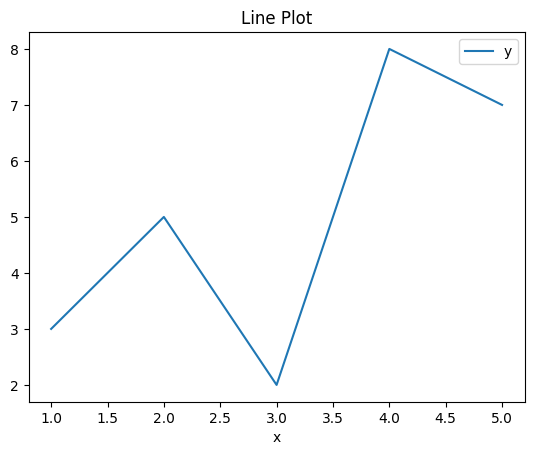

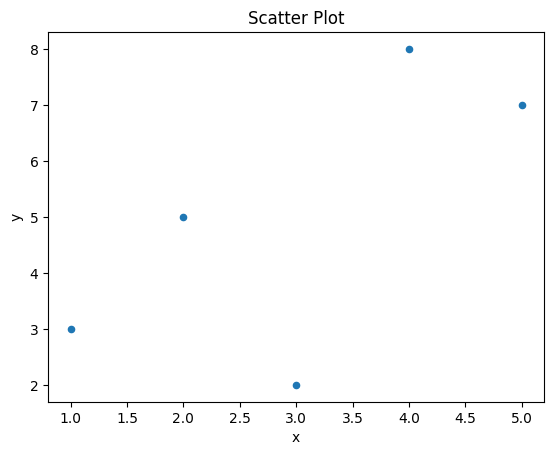

In [ ]:
import matplotlib.pyplot as plt

df_plot = pd.DataFrame({
    'x': [1, 2, 3, 4, 5],
    'y': [3, 5, 2, 8, 7],
    'z': [1, 3, 4, 2, 6]
})

# Line plot
df_plot.plot(x='x', y='y', kind='line', title='Line Plot', marker='o')
plt.grid(True)
plt.show()

# Scatter plot
df_plot.plot.scatter(x='x', y='y', title='Scatter Plot', s=100, c='red')
plt.show()

# Bar plot
df_plot.plot.bar(x='x', y=['y', 'z'], title='Bar Plot')
plt.show()

# Histogram
df_hist = pd.DataFrame({'values': np.random.randn(100)})
df_hist.plot.hist(bins=20, title='Histogram', alpha=0.7)
plt.show()

# Box plot
df_box = pd.DataFrame({
    'A': np.random.randn(50),
    'B': np.random.randn(50) + 1,
    'C': np.random.randn(50) + 2
})
df_box.plot.box(title='Box Plot')
plt.show()


## DataFrame & Series Info

```
    Information Methods
    ===================
    
    ┌─────────────────┐
    │   DataFrame     │
    └────────┬────────┘
             │
    ┌────────┴─────────┬──────────────┬────────────┐
    │                  │              │            │
    ▼                  ▼              ▼            ▼
┌─────────┐      ┌──────────┐   ┌─────────┐  ┌──────────┐
│ .info() │      │ .shape   │   │.dtypes  │  │.describe()│
│         │      │.columns  │   │.memory_ │  │          │
│         │      │.index    │   │ usage() │  │          │
└─────────┘      └──────────┘   └─────────┘  └──────────┘
 Structure        Dimensions     Data Types    Statistics
```

Retrieve comprehensive metadata about DataFrames including structure, dimensions, data types, and memory usage.


In [ ]:
df_info = pd.DataFrame({
    'Name': ['Alice', 'Bob', 'Charlie'],
    'Age': [25, 30, 35],
    'Salary': [50000.0, 60000.0, 70000.0],
    'Active': [True, False, True]
})

print("--- DataFrame Info ---")
print(df_info.info())

print("\n--- DataFrame Attributes ---")
print("Shape (rows, cols):", df_info.shape)
print("Columns:", df_info.columns.tolist())
print("Index:", df_info.index.tolist())

print("\n--- Data Types ---")
print(df_info.dtypes)

print("\n--- Memory Usage ---")
print(df_info.memory_usage(deep=True))

print("\n--- Descriptive Statistics ---")
print(df_info.describe())

print("\n--- Include all columns in describe ---")
print(df_info.describe(include='all'))

print("\n--- First/Last Rows ---")
print("First 2 rows:")
print(df_info.head(2))
print("\nLast 2 rows:")
print(df_info.tail(2))

print("\n--- Number of rows and columns ---")
print(f"Rows: {len(df_info)}, Columns: {len(df_info.columns)}")

print("\n--- Check for duplicates ---")
print("Any duplicates?", df_info.duplicated().any())


df_plot info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   x       5 non-null      int64
 1   y       5 non-null      int64
dtypes: int64(2)
memory usage: 212.0 bytes


None


DataFrame attributes:
Shape: (5, 2)
Columns: Index(['x', 'y'], dtype='object')
Index: RangeIndex(start=0, stop=5, step=1)

DataFrame dtypes:


x    int64
y    int64
dtype: object


Descriptive statistics:


,x,y
count,5.000000,5.00000
mean,3.000000,5.00000
std,1.581139,2.54951
min,1.000000,2.00000
25%,2.000000,3.00000
50%,3.000000,5.00000
75%,4.000000,7.00000
max,5.000000,8.00000


## Applying Functions

```
    Apply Operations
    ================
    
    ┌─────────────────┐
    │   DataFrame     │
    └────────┬────────┘
             │
    ┌────────┴─────────┬──────────────┬────────────┐
    │                  │              │            │
    ▼                  ▼              ▼            ▼
┌─────────┐      ┌──────────┐   ┌─────────┐  ┌──────────┐
│ .apply()│      │.applymap()│   │ .map()  │  │.transform│
│(axis=0/1)│     │(element-  │   │(Series) │  │(groupby) │
│         │      │  wise)    │   │         │  │          │
└─────────┘      └──────────┘   └─────────┘  └──────────┘
Column/Row        All Elements   Element      Broadcast
Operations        (Deprecated)   Mapping      Results
```

Apply custom functions to DataFrames and Series:
- **apply()**: Apply function along axis (column/row-wise)
- **map()**: Element-wise transformation for Series
- **applymap()**: Element-wise for DataFrame (deprecated, use `.map()` instead in pandas 2.1+)


In [ ]:
df_apply = pd.DataFrame({
    'A': [1, 2, 3, 4],
    'B': [10, 20, 30, 40],
    'C': [100, 200, 300, 400]
})
print("Original DataFrame:")
print(df_apply)

# Apply function to each column (axis=0, default)
print("\n--- Apply sum to each column (axis=0) ---")
print(df_apply.apply(np.sum, axis=0))

# Apply function to each row (axis=1)
print("\n--- Apply sum to each row (axis=1) ---")
print(df_apply.apply(np.sum, axis=1))

# Apply custom function
def custom_func(x):
    return x.max() - x.min()

print("\n--- Apply custom function (range) to each column ---")
print(df_apply.apply(custom_func, axis=0))

# Apply lambda function to Series (element-wise)
print("\n--- Apply lambda to Series (element-wise) ---")
df_apply['A_squared'] = df_apply['A'].apply(lambda x: x ** 2)
print(df_apply)

# Map (element-wise transformation for Series)
print("\n--- Using .map() on Series ---")
mapping = {1: 'one', 2: 'two', 3: 'three', 4: 'four'}
df_apply['A_mapped'] = df_apply['A'].map(mapping)
print(df_apply)

# DataFrame.map() (element-wise, replaces applymap in pandas 2.1+)
print("\n--- Using .map() on DataFrame (element-wise) ---")
df_small = pd.DataFrame({'X': [1, 2], 'Y': [3, 4]})
print("Original:")
print(df_small)
print("\nAfter .map(lambda x: x * 10):")
print(df_small.map(lambda x: x * 10))

# Apply with multiple return values
print("\n--- Apply returning Series ---")
def stats(x):
    return pd.Series({'min': x.min(), 'max': x.max(), 'mean': x.mean()})

print(df_apply[['A', 'B', 'C']].apply(stats, axis=0))

# Using vectorized operations (preferred over apply when possible)
print("\n--- Vectorized operations (faster than apply) ---")
df_apply['D'] = df_apply['A'] * 2 + df_apply['B']
print(df_apply)


df_stats


,Col1,Col2,Col3,Category,Status
0,74,65,92,A,Active
1,96,70,76,B,Inactive
2,63,68,83,A,Active
3,35,85,75,C,Active
4,56,11,42,B,Inactive


Applying sum to each column:


Col1    324
Col2    299
dtype: int64


Applying lambda x: x * 2 to each element:


/var/folders/wj/pbgm2qxx6vbfvq55xm8k42jh0000gn/T/ipykernel_43554/389234560.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_applied = df_stats.applymap(lambda x: x * 2)


,Col1,Col2,Col3,Category,Status
0,148,130,184,AA,ActiveActive
1,192,140,152,BB,InactiveInactive
2,126,136,166,AA,ActiveActive
3,70,170,150,CC,ActiveActive
4,112,22,84,BB,InactiveInactive



Adding 10 to each element in Col1:


0     84
1    106
2     73
3     45
4     66
Name: Col1, dtype: int64


Sum of Col1 and Col2:


,Col1,Col2,Col3,Category,Status,row_sums
0,74,65,92,A,Active,139
1,96,70,76,B,Inactive,166
2,63,68,83,A,Active,131
3,35,85,75,C,Active,120
4,56,11,42,B,Inactive,67


## Data Alignment

```
    Index Alignment
    ===============
    
    Series 1         Series 2         Result
    ┌───┬───┐        ┌───┬───┐        ┌───┬─────┐
    │ a │ 1 │        │ b │ 4 │        │ a │ NaN │
    │ b │ 2 │    +   │ c │ 5 │   =    │ b │ 6   │
    │ c │ 3 │        │ d │ 6 │        │ c │ 8   │
    └───┴───┘        └───┴───┘        │ d │ NaN │
                                      └───┴─────┘
    
    Automatic alignment based on index labels
    
    With fill_value=0:
    ┌───┬─────┐
    │ a │ 1   │
    │ b │ 6   │
    │ c │ 8   │
    │ d │ 6   │
    └───┴─────┘
```

When performing operations on Series or DataFrames with different indexes, pandas automatically aligns data based on labels. Misaligned labels result in `NaN` unless you specify a `fill_value`.


In [ ]:
s1 = pd.Series([1, 2, 3], index=['a', 'b', 'c'])
s2 = pd.Series([4, 5, 6], index=['b', 'c', 'd'])

print("Series 1:")
print(s1)
print("\nSeries 2:")
print(s2)

# Addition auto-aligns on index (NaN for non-matching labels)
s_sum = s1 + s2
print("\n--- Auto-aligned addition (s1 + s2) ---")
print(s_sum)

# Fill missing with 0 while adding
s_sum_fill = s1.add(s2, fill_value=0)
print("\n--- Addition with fill_value=0 ---")
print(s_sum_fill)

# Other operations with fill_value
print("\n--- Subtraction with fill_value=0 ---")
print(s1.sub(s2, fill_value=0))

print("\n--- Multiplication with fill_value=1 ---")
print(s1.mul(s2, fill_value=1))

# DataFrame alignment
df1 = pd.DataFrame({'A': [1, 2], 'B': [3, 4]}, index=[0, 1])
df2 = pd.DataFrame({'B': [5, 6], 'C': [7, 8]}, index=[1, 2])

print("\n--- DataFrame Alignment ---")
print("DataFrame 1:")
print(df1)
print("\nDataFrame 2:")
print(df2)

print("\ndf1 + df2 (auto-aligned):")
print(df1 + df2)

print("\ndf1.add(df2, fill_value=0):")
print(df1.add(df2, fill_value=0))

# Reindex to match specific index
print("\n--- Reindexing ---")
s_reindexed = s1.reindex(['a', 'b', 'c', 'd', 'e'], fill_value=0)
print("Reindexed s1 with new labels:")
print(s_reindexed)


s1:


a    1
b    2
c    3
dtype: int64


s2:


b    4
c    5
d    6
dtype: int64


Auto-aligned sum:


a    NaN
b    6.0
c    8.0
d    NaN
dtype: float64


Sum with fill_value=0:


a    1.0
b    6.0
c    8.0
d    6.0
dtype: float64

## I/O: Reading & Writing Data

```
    Input/Output Operations
    ========================
    
    ┌─────────────────────────────────┐
    │      External Data Sources      │
    └──────────────┬──────────────────┘
                   │
    ┌──────────────┼──────────────┬────────────┐
    │              │              │            │
    ▼              ▼              ▼            ▼
┌────────┐    ┌────────┐    ┌────────┐   ┌────────┐
│  CSV   │    │ Excel  │    │  SQL   │   │  JSON  │
└───┬────┘    └───┬────┘    └───┬────┘   └───┬────┘
    │             │             │            │
    ▼             ▼             ▼            ▼
read_csv()   read_excel() read_sql()   read_json()
to_csv()     to_excel()   to_sql()     to_json()
    │             │             │            │
    └─────────────┴─────────────┴────────────┘
                   │
                   ▼
           ┌─────────────────┐
           │   DataFrame     │
           └─────────────────┘
```

Pandas supports reading from and writing to multiple file formats including CSV, Excel, SQL, JSON, Parquet, HDF5, and more.


In [ ]:
# Create a sample DataFrame for I/O operations
df_io = pd.DataFrame({
    'Name': ['Alice', 'Bob', 'Charlie'],
    'Age': [25, 30, 35],
    'City': ['New York', 'Paris', 'London']
})

# === CSV Operations ===
# Write to CSV
df_io.to_csv('sample_data.csv', index=False)
print("CSV file created: sample_data.csv")

# Read from CSV
df_from_csv = pd.read_csv('sample_data.csv')
print("\nRead from CSV:")
print(df_from_csv)

# Read CSV with specific parameters
# df_csv = pd.read_csv('file.csv', sep=',', header=0, names=['col1', 'col2'], 
#                      usecols=[0, 1], nrows=100, skiprows=1, na_values=['NA', 'null'])

# === JSON Operations ===
# Write to JSON
df_io.to_json('sample_data.json', orient='records', indent=2)
print("\nJSON file created: sample_data.json")

# Read from JSON
df_from_json = pd.read_json('sample_data.json', orient='records')
print("\nRead from JSON:")
print(df_from_json)

# === Excel Operations (requires openpyxl or xlrd) ===
# Uncomment if you have openpyxl installed
# df_io.to_excel('sample_data.xlsx', sheet_name='Sheet1', index=False)
# df_from_excel = pd.read_excel('sample_data.xlsx', sheet_name='Sheet1')

# === SQL Operations (requires sqlalchemy) ===
# from sqlalchemy import create_engine
# engine = create_engine('sqlite:///sample_database.db')
# df_io.to_sql('users', engine, if_exists='replace', index=False)
# df_from_sql = pd.read_sql('SELECT * FROM users', engine)
# df_from_sql_query = pd.read_sql_query('SELECT * FROM users WHERE Age > 25', engine)

# === Other formats ===
# Parquet (efficient columnar storage)
# df_io.to_parquet('sample_data.parquet')
# df_from_parquet = pd.read_parquet('sample_data.parquet')

# Pickle (preserves exact DataFrame structure)
# df_io.to_pickle('sample_data.pkl')
# df_from_pickle = pd.read_pickle('sample_data.pkl')

# HTML tables
# df_io.to_html('sample_data.html')
# df_from_html = pd.read_html('webpage.html')[0]  # Returns list of DataFrames

# Clipboard (useful for quick copy-paste)
# df_io.to_clipboard()
# df_from_clipboard = pd.read_clipboard()

print("\n--- Common read_csv parameters ---")
print("sep/delimiter: Field separator")
print("header: Row number to use as column names")
print("names: List of column names to use")
print("usecols: Return subset of columns")
print("dtype: Data type for columns")
print("parse_dates: Parse date columns")
print("na_values: Additional strings to recognize as NA/NaN")


## Method Chaining

```
    Method Chaining Pattern
    =======================
    
    ┌─────────────┐
    │  DataFrame  │
    └──────┬──────┘
           │
           ▼
    ┌──────────┐
    │ .method1()│
    └──────┬───┘
           │
           ▼
    ┌──────────┐
    │ .method2()│
    └──────┬───┘
           │
           ▼
    ┌──────────┐
    │ .method3()│
    └──────┬───┘
           │
           ▼
    ┌──────────┐
    │  Result  │
    └──────────┘
    
    Benefits:
    • Readable pipeline
    • Less intermediate variables
    • Easier to debug
```

Method chaining involves writing multiple pandas operations in a single expression by chaining them with dots (`.`). This improves readability and reduces intermediate variables. Use parentheses for multi-line chains.


In [ ]:
df_chain = pd.DataFrame({
    'A': [1, 2, 3, 4, 5],
    'B': [5, 6, 7, 8, 9],
    'Category': ['X', 'Y', 'X', 'Y', 'Z']
})
print("Original DataFrame:")
print(df_chain)

# Example of method chaining: filter, create column, sort
result = (
    df_chain
    .query('A > 2')  # Filter rows
    .assign(C=lambda x: x['A'] + x['B'])  # Create new column
    .sort_values('C', ascending=False)  # Sort
    .reset_index(drop=True)  # Reset index
)
print("\n--- Method Chaining Result ---")
print(result)

# More complex chain: melt, rename, filter
df_wide_chain = pd.DataFrame({
    'id': [1, 2, 3],
    'var1': [10, 20, 30],
    'var2': [40, 50, 60]
})

result_complex = (
    df_wide_chain
    .melt(id_vars='id', var_name='Variable', value_name='Value')
    .assign(Value_Doubled=lambda x: x['Value'] * 2)
    .query('Value > 15')
    .sort_values('Value', ascending=False)
    .reset_index(drop=True)
)
print("\n--- Complex Method Chain ---")
print(result_complex)

# Using pipe() for custom functions in chains
def add_suffix(df, col, suffix):
    df[col] = df[col].astype(str) + suffix
    return df

result_pipe = (
    df_chain
    .pipe(add_suffix, 'Category', '_modified')
    .assign(Sum=lambda x: x['A'] + x['B'])
)
print("\n--- Method Chain with pipe() ---")
print(result_pipe)

# Groupby in method chain
result_group = (
    df_chain
    .groupby('Category')
    .agg({'A': 'sum', 'B': 'mean'})
    .reset_index()
    .rename(columns={'A': 'A_sum', 'B': 'B_mean'})
)
print("\n--- GroupBy in Method Chain ---")
print(result_group)


,var,val
3,A,4
4,B,5
5,B,6
6,B,7
7,B,8


## Sampling, `nlargest`, and `nsmallest`

```
    Selection Methods
    =================
    
    ┌─────────────────┐
    │   DataFrame     │
    │   [All Rows]    │
    └────────┬────────┘
             │
    ┌────────┴─────────┬──────────────┬────────────┐
    │                  │              │            │
    ▼                  ▼              ▼            ▼
┌──────────┐     ┌──────────┐   ┌─────────┐  ┌──────────┐
│ .sample()│     │.nlargest()│   │.nsmallest│  │ .head() │
│(random)  │     │(top N)   │   │(bottom N)│  │ .tail() │
└──────────┘     └──────────┘   └─────────┘  └──────────┘
     │                │              │             │
  n=3 or          sorted by       sorted by    first/last
 frac=0.5          column          column         N rows
```

- **sample()**: Randomly sample rows or a fraction of the DataFrame
- **nlargest()**: Select top N rows based on column value(s)
- **nsmallest()**: Select bottom N rows based on column value(s)


In [ ]:
df_sample = pd.DataFrame({
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve', 'Frank'],
    'Score': [85, 92, 78, 95, 88, 76]
})
print("Original DataFrame:")
print(df_sample)

# Random sample of N rows
np.random.seed(42)
sampled_n = df_sample.sample(n=3)
print("\n--- Random sample of 3 rows ---")
print(sampled_n)

# Random sample of fraction of rows
sampled_frac = df_sample.sample(frac=0.5)
print("\n--- Random sample of 50% rows ---")
print(sampled_frac)

# Sample with replacement
sampled_replace = df_sample.sample(n=8, replace=True)
print("\n--- Sample with replacement (n=8) ---")
print(sampled_replace)

# nlargest - top N values
largest_two = df_sample.nlargest(2, 'Score')
print("\n--- 2 largest scores ---")
print(largest_two)

# nsmallest - bottom N values
smallest_two = df_sample.nsmallest(2, 'Score')
print("\n--- 2 smallest scores ---")
print(smallest_two)

# nlargest with multiple columns
df_multi = pd.DataFrame({
    'Team': ['A', 'B', 'C', 'D', 'E'],
    'Wins': [10, 10, 8, 12, 10],
    'Points': [25, 30, 22, 35, 28]
})
print("\n--- Original DataFrame (multiple columns) ---")
print(df_multi)

# nlargest on multiple columns (first by Wins, then by Points)
top_teams = df_multi.nlargest(3, ['Wins', 'Points'])
print("\n--- Top 3 teams by Wins, then Points ---")
print(top_teams)

# Stratified sampling (sample from each group)
df_stratify = pd.DataFrame({
    'Category': ['A', 'A', 'A', 'B', 'B', 'B', 'C', 'C'],
    'Value': [1, 2, 3, 4, 5, 6, 7, 8]
})
print("\n--- Stratified sampling (1 from each category) ---")
stratified = df_stratify.groupby('Category', group_keys=False).apply(lambda x: x.sample(1))
print(stratified)


Original Data:


,ColA
0,5
1,2
2,9
3,1
4,7
5,3



Random sample of 3 rows:


,ColA
3,1
0,5
5,3



2 largest in ColA:


,ColA
2,9
4,7



2 smallest in ColA:


,ColA
3,1
1,2


## Drop Duplicates

```
    Duplicate Handling
    ==================
    
    Original DataFrame
    ┌────┬────┐
    │ X  │ Y  │
    ├────┼────┤
    │ 1  │ 10 │ ←─┐
    │ 1  │ 10 │ ←─┤ Duplicates
    │ 2  │ 20 │   │
    │ 2  │ 30 │   │
    │ 3  │ 30 │ ←─┘
    └────┴────┘
    
    After .drop_duplicates()
    ┌────┬────┐
    │ X  │ Y  │
    ├────┼────┤
    │ 1  │ 10 │ ← Kept (first)
    │ 2  │ 20 │
    │ 2  │ 30 │
    │ 3  │ 30 │
    └────┴────┘
```

- **drop_duplicates()**: Remove duplicate rows based on all columns or a subset
- **keep**: Which duplicates to keep ('first', 'last', False to drop all)
- **duplicated()**: Boolean mask showing duplicate rows


In [ ]:
df_dup = pd.DataFrame({
    'X': [1, 1, 2, 2, 3, 3],
    'Y': [10, 10, 20, 30, 30, 30]
})
print("Original DataFrame:")
print(df_dup)

# Check for duplicates
print("\n--- Boolean mask of duplicates ---")
print(df_dup.duplicated())

print("\n--- Rows that are duplicates ---")
print(df_dup[df_dup.duplicated()])

# Drop duplicates (keep first occurrence by default)
df_no_dup = df_dup.drop_duplicates()
print("\n--- After drop_duplicates() [keep='first'] ---")
print(df_no_dup)

# Drop duplicates, keep last occurrence
df_keep_last = df_dup.drop_duplicates(keep='last')
print("\n--- After drop_duplicates(keep='last') ---")
print(df_keep_last)

# Drop ALL duplicates (don't keep any)
df_drop_all = df_dup.drop_duplicates(keep=False)
print("\n--- After drop_duplicates(keep=False) ---")
print(df_drop_all)

# Drop duplicates based on specific column(s)
df_subset = pd.DataFrame({
    'A': [1, 1, 2, 3],
    'B': [10, 20, 30, 40]
})
print("\n--- Original DataFrame ---")
print(df_subset)

print("\n--- Drop duplicates based on column 'A' ---")
print(df_subset.drop_duplicates(subset=['A']))

# Count duplicates
print("\n--- Count of duplicate rows ---")
print(f"Number of duplicates: {df_dup.duplicated().sum()}")

# Find duplicate groups
print("\n--- Duplicate groups (keep=False shows all) ---")
duplicates_all = df_dup[df_dup.duplicated(keep=False)]
print(duplicates_all.sort_values(['X', 'Y']))


Original Data:


,X,Y
0,1,10
1,1,10
2,2,20
3,2,30
4,3,30



After drop_duplicates:


,X,Y
0,1,10
2,2,20
3,2,30
4,3,30


## `value_counts` and Counting Uniques

```
    Frequency Analysis
    ==================
    
    ┌─────────────────┐
    │     Series      │
    │ [a, b, a, c, b] │
    └────────┬────────┘
             │
    ┌────────┴─────────┬──────────────┐
    │                  │              │
    ▼                  ▼              ▼
┌──────────┐     ┌──────────┐   ┌─────────┐
│ .value_  │     │.nunique()│   │.unique()│
│ counts() │     │          │   │         │
└─────┬────┘     └─────┬────┘   └────┬────┘
      │                │             │
      ▼                ▼             ▼
   a: 2             3 unique      [a, b, c]
   b: 2          (count of        (array of
   c: 1           uniques)         uniques)
```

- **value_counts()**: Frequency distribution (count of each unique value)
- **nunique()**: Number of unique values
- **unique()**: Array of unique values


In [ ]:
s_counts = pd.Series(['apple', 'banana', 'apple', 'orange', 'banana', 'apple'])
print("Original Series:")
print(s_counts)

# Value counts (frequency distribution)
print("\n--- Value counts ---")
print(s_counts.value_counts())

# Value counts with normalize (proportions/percentages)
print("\n--- Value counts (normalized) ---")
print(s_counts.value_counts(normalize=True))

# Value counts in descending order (default)
print("\n--- Value counts (ascending order) ---")
print(s_counts.value_counts(ascending=True))

# Number of unique values
print("\n--- Number of unique values ---")
print(f"nunique(): {s_counts.nunique()}")

# Get unique values as array
print("\n--- Unique values ---")
print(f"unique(): {s_counts.unique()}")

# Value counts including NaN
s_with_nan = pd.Series(['a', 'b', 'a', None, 'b', None])
print("\n--- Series with NaN ---")
print(s_with_nan)
print("\nValue counts (dropna=True, default):")
print(s_with_nan.value_counts())
print("\nValue counts (dropna=False):")
print(s_with_nan.value_counts(dropna=False))

# Value counts on DataFrame column
df_counts = pd.DataFrame({
    'Category': ['A', 'B', 'A', 'C', 'B', 'A', 'C'],
    'Status': ['Active', 'Inactive', 'Active', 'Active', 'Inactive', 'Active', 'Inactive']
})
print("\n--- DataFrame ---")
print(df_counts)
print("\n--- Value counts for 'Category' ---")
print(df_counts['Category'].value_counts())
print("\n--- Value counts for 'Status' ---")
print(df_counts['Status'].value_counts())

# Crosstab for frequency of combinations
print("\n--- Crosstab (Category vs Status) ---")
print(pd.crosstab(df_counts['Category'], df_counts['Status']))


Original Series:


0     apple
1    banana
2     apple
3    orange
4    banana
dtype: object


Value counts:


apple     2
banana    2
orange    1
Name: count, dtype: int64


Number of unique values:


3

## Regex Filtering

```
    Regular Expression Filtering
    =============================
    
    ┌──────────────────────────────────┐
    │  DataFrame with Many Columns     │
    │ [width_cm, height_cm, depth_m]   │
    └───────────────┬──────────────────┘
                    │
                    ▼ .filter(regex='_cm$')
    ┌───────────────────────────────────┐
    │   Filtered Columns                │
    │   [width_cm, height_cm]           │
    └───────────────────────────────────┘
    
    Common Patterns:
    • '^prefix'  : Starts with
    • 'suffix$'  : Ends with
    • '.*text.*' : Contains
    • 'col[0-9]' : Pattern match
```

**df.filter(regex=...)**: Select columns matching a regular expression pattern. Useful when dealing with many columns that share naming conventions (e.g., feature_1, feature_2, etc.).


In [ ]:
df_filter = pd.DataFrame({
    'width_cm': [10, 15, 20],
    'height_cm': [5, 8, 12],
    'depth_m': [0.5, 0.8, 1.2],
    'weight_kg': [2.5, 3.0, 3.5],
    'temp_celsius': [20, 22, 25]
})
print("Original DataFrame:")
print(df_filter)

# Filter columns that END with '_cm'
cm_cols = df_filter.filter(regex='_cm$')
print("\n--- Columns ending with '_cm' ---")
print(cm_cols)

# Filter columns that START with 'w'
w_cols = df_filter.filter(regex='^w')
print("\n--- Columns starting with 'w' ---")
print(w_cols)

# Filter columns that CONTAIN 'eight'
eight_cols = df_filter.filter(regex='eight')
print("\n--- Columns containing 'eight' ---")
print(eight_cols)

# Filter columns matching pattern with OR
metric_cols = df_filter.filter(regex='_cm$|_m$|_kg$')
print("\n--- Columns ending with '_cm' OR '_m' OR '_kg' ---")
print(metric_cols)

# Filter using like (simple string match, not regex)
print("\n--- Filter using 'like' (contains 'cm') ---")
like_cols = df_filter.filter(like='cm')
print(like_cols)

# Filter rows by index (using regex on index)
df_indexed = pd.DataFrame({
    'A': [1, 2, 3, 4],
    'B': [5, 6, 7, 8]
}, index=['row_1', 'row_2', 'col_1', 'col_2'])
print("\n--- Original DataFrame with custom index ---")
print(df_indexed)

row_filtered = df_indexed.filter(regex='^row', axis=0)
print("\n--- Rows with index starting with 'row' ---")
print(row_filtered)

# String operations on column names
print("\n--- String operations on column names ---")
df_filter.columns = df_filter.columns.str.replace('_', ' ')
print("Columns after replacing '_' with ' ':")
print(df_filter.columns.tolist())


Original DataFrame:


,width_cm,height_cm,depth_m
0,10,5,0.5
1,15,8,0.8
2,20,12,1.2



Columns that end with '_cm':


,width_cm,height_cm
0,10,5
1,15,8
2,20,12


## Using `df.query(...)`

```
    Query Syntax
    ============
    
    ┌─────────────────┐
    │   DataFrame     │
    └────────┬────────┘
             │
             ▼ .query("condition")
    ┌──────────────────┐
    │ Filtered Result  │
    └──────────────────┘
    
    Example Conditions:
    • "col1 > 5"
    • "col1 > 5 and col2 < 6"
    • "col1 > 5 | col2 < 6"
    • "col1 in [1, 2, 3]"
    • "col1 not in @list_var"
    • "`column name` > 5" (backticks for spaces)
```

**df.query(expr)** uses a string expression to filter rows. It's more readable than boolean indexing for complex conditions. Use `@` to reference external variables.


In [ ]:
df_query = pd.DataFrame({
    'col1': [5, 10, 15, 20, 25],
    'col2': [2, 4, 6, 8, 10],
    'category': ['A', 'B', 'A', 'B', 'C']
})
print("Original DataFrame:")
print(df_query)

# Simple query
filtered1 = df_query.query("col1 > 10")
print("\n--- Query: col1 > 10 ---")
print(filtered1)

# Query with AND
filtered2 = df_query.query("col1 > 5 and col2 < 8")
print("\n--- Query: col1 > 5 and col2 < 8 ---")
print(filtered2)

# Query with OR
filtered3 = df_query.query("col1 < 10 or col2 > 8")
print("\n--- Query: col1 < 10 or col2 > 8 ---")
print(filtered3)

# Query with 'in' operator
filtered4 = df_query.query("category in ['A', 'B']")
print("\n--- Query: category in ['A', 'B'] ---")
print(filtered4)

# Query with 'not in' operator
filtered5 = df_query.query("category not in ['C']")
print("\n--- Query: category not in ['C'] ---")
print(filtered5)

# Query with external variable (use @ prefix)
threshold = 15
filtered6 = df_query.query("col1 > @threshold")
print(f"\n--- Query: col1 > @threshold (threshold={threshold}) ---")
print(filtered6)

# Query with column names containing spaces (use backticks)
df_spaces = pd.DataFrame({
    'column one': [1, 2, 3, 4],
    'column two': [5, 6, 7, 8]
})
print("\n--- DataFrame with spaces in column names ---")
print(df_spaces)
filtered7 = df_spaces.query("`column one` > 2")
print("\nQuery: `column one` > 2")
print(filtered7)

# Query with string operations
filtered8 = df_query.query("category == 'A'")
print("\n--- Query: category == 'A' ---")
print(filtered8)

# Complex query
filtered9 = df_query.query("(col1 > 10 and col2 < 10) or category == 'C'")
print("\n--- Query: (col1 > 10 and col2 < 10) or category == 'C' ---")
print(filtered9)


Original Data:


,col1,col2
0,5,2
1,10,4
2,15,6



Filtered via query:


,col1,col2
1,10,4


## pivot vs pivot_table

```
    Reshaping: pivot vs pivot_table
    ================================
    
    Long Format                 Wide Format
    ┌───────┬────────┬───────┐  ┌───────┬─────┬─────┐
    │ month │category│ value │  │ month │  A  │  B  │
    ├───────┼────────┼───────┤  ├───────┼─────┼─────┤
    │ Jan   │   A    │  10   │  │ Jan   │ 10  │ 20  │
    │ Jan   │   B    │  20   │  │ Feb   │ 30  │ 40  │
    │ Feb   │   A    │  30   │  └───────┴─────┴─────┘
    │ Feb   │   B    │  40   │
    └───────┴────────┴───────┘
    
    pivot(): Requires unique index/column pairs
    pivot_table(): Can aggregate duplicates
```

- **pivot()**: Reshapes without aggregation. Requires unique index/column combinations
- **pivot_table()**: Reshapes with aggregation (handles duplicates). More flexible with aggfunc parameter


In [ ]:
df_pivot_example = pd.DataFrame({
    'month': ['Jan', 'Jan', 'Feb', 'Feb'],
    'category': ['A', 'B', 'A', 'B'],
    'value': [10, 20, 30, 40]
})
print("Original DataFrame (Long Format):")
print(df_pivot_example)

# pivot (no aggregation, requires unique index/column pairs)
df_pivoted = df_pivot_example.pivot(
    index='month',
    columns='category',
    values='value'
)
print("\n--- pivot() result (Wide Format) ---")
print(df_pivoted)

# pivot_table (with aggregation)
df_with_duplicates = pd.DataFrame({
    'month': ['Jan', 'Jan', 'Jan', 'Feb', 'Feb', 'Feb'],
    'category': ['A', 'B', 'A', 'A', 'B', 'B'],
    'value': [10, 20, 15, 30, 40, 45]
})
print("\n--- DataFrame with duplicates ---")
print(df_with_duplicates)

# pivot would fail here due to duplicates, use pivot_table instead
df_pivoted_tbl = df_with_duplicates.pivot_table(
    index='month',
    columns='category',
    values='value',
    aggfunc='sum'  # Aggregation function
)
print("\n--- pivot_table() with aggfunc='sum' ---")
print(df_pivoted_tbl)

# pivot_table with different aggregation functions
df_pivoted_mean = df_with_duplicates.pivot_table(
    index='month',
    columns='category',
    values='value',
    aggfunc='mean'
)
print("\n--- pivot_table() with aggfunc='mean' ---")
print(df_pivoted_mean)

# pivot_table with multiple aggregation functions
df_pivoted_multi = df_with_duplicates.pivot_table(
    index='month',
    columns='category',
    values='value',
    aggfunc=['sum', 'mean', 'count']
)
print("\n--- pivot_table() with multiple aggfuncs ---")
print(df_pivoted_multi)

# pivot_table with margins (totals)
df_pivoted_margins = df_with_duplicates.pivot_table(
    index='month',
    columns='category',
    values='value',
    aggfunc='sum',
    margins=True,
    margins_name='Total'
)
print("\n--- pivot_table() with margins=True ---")
print(df_pivoted_margins)

# Multiple columns in index
df_multi_index = pd.DataFrame({
    'region': ['East', 'East', 'West', 'West'],
    'month': ['Jan', 'Feb', 'Jan', 'Feb'],
    'product': ['A', 'A', 'A', 'A'],
    'sales': [100, 150, 200, 250]
})
print("\n--- DataFrame with multiple index columns ---")
print(df_multi_index)

pivoted_multi = df_multi_index.pivot_table(
    index=['region', 'month'],
    columns='product',
    values='sales',
    aggfunc='sum'
)
print("\n--- pivot_table() with multiple index columns ---")
print(pivoted_multi)


Original DataFrame:


,month,category,value
0,Jan,A,10
1,Jan,B,20
2,Feb,A,30
3,Feb,B,40



Pivot Table with aggregation:


category,A,B
month,,
Feb,30,40
Jan,10,20


## shift, rank, and Cumulative Operations

```
    Transformations
    ===============
    
    Original: [100, 200, 200, 300]
    
    .shift(1)
    ─────────
    [NaN, 100, 200, 200]
    Move values down 1 position
    
    .rank(method='dense')
    ─────────────────────
    [1, 2, 2, 3]
    Assign ranks (ties get same rank)
    
    .cumsum()
    ─────────
    [100, 300, 500, 800]
    Cumulative sum
    
    .diff()
    ───────
    [NaN, 100, 0, 100]
    Difference from previous value
```

- **shift()**: Move index by specified periods (useful for lag/lead features)
- **rank()**: Assign numeric rank to entries (with various tie-breaking methods)
- **cumsum/cummax/cummin/cumprod()**: Cumulative operations
- **diff()**: Difference between consecutive elements


In [ ]:
df_cum = pd.DataFrame({
    'vals': [100, 200, 200, 300, 150]
})
print("Original DataFrame:")
print(df_cum)

# shift by 1 (move down)
df_cum['shifted_1'] = df_cum['vals'].shift(1)
print("\n--- After shift(1) ---")
print(df_cum)

# shift by -1 (move up / lead)
df_cum['shifted_neg1'] = df_cum['vals'].shift(-1)
print("\n--- After shift(-1) ---")
print(df_cum)

# Rank with 'dense' method (ties get same rank, no gaps)
df_cum['rank_dense'] = df_cum['vals'].rank(method='dense')
print("\n--- Rank (method='dense') ---")
print(df_cum)

# Rank with 'min' method (ties get minimum rank)
df_cum['rank_min'] = df_cum['vals'].rank(method='min')
print("\n--- Rank (method='min') ---")
print(df_cum)

# Rank with 'average' method (default, ties get average rank)
df_cum['rank_avg'] = df_cum['vals'].rank(method='average')
print("\n--- Rank (method='average') ---")
print(df_cum)

# Cumulative sum
df_cum['cumsum'] = df_cum['vals'].cumsum()
print("\n--- Cumulative sum ---")
print(df_cum)

# Cumulative max
df_cum['cummax'] = df_cum['vals'].cummax()
print("\n--- Cumulative max ---")
print(df_cum)

# Cumulative min
df_cum['cummin'] = df_cum['vals'].cummin()
print("\n--- Cumulative min ---")
print(df_cum)

# Cumulative product
df_small = pd.DataFrame({'vals': [2, 3, 4]})
df_small['cumprod'] = df_small['vals'].cumprod()
print("\n--- Cumulative product ---")
print(df_small)

# Difference (current - previous)
df_diff = pd.DataFrame({'vals': [10, 15, 18, 20, 22]})
df_diff['diff'] = df_diff['vals'].diff()
print("\n--- Difference (current - previous) ---")
print(df_diff)

# Percentage change
df_diff['pct_change'] = df_diff['vals'].pct_change()
print("\n--- Percentage change ---")
print(df_diff)

# Ranking in descending order
df_rank_desc = pd.DataFrame({'score': [85, 92, 78, 92, 88]})
df_rank_desc['rank'] = df_rank_desc['score'].rank(ascending=False, method='min')
print("\n--- Rank in descending order ---")
print(df_rank_desc)


Original Data:


,vals
0,100
1,200
2,200
3,300



Rank (dense) on 'vals':


,vals,rank
0,100,1.0
1,200,2.0
2,200,2.0
3,300,3.0



After shifting 'vals' by 1:


,vals,rank,shifted_vals
0,100,1.0,NaN
1,200,2.0,100.0
2,200,2.0,200.0
3,300,3.0,200.0



Cumulative sum of 'vals':


,vals,rank,shifted_vals,cumulative_sum
0,100,1.0,NaN,100
1,200,2.0,100.0,300
2,200,2.0,200.0,500
3,300,3.0,200.0,800


## Performance Best Practices

```
    Pandas Performance Optimization
    ================================
    
    ┌────────────────────────────────┐
    │   1. Use Vectorized Operations │
    │   ✅ df['new'] = df['A'] * 2   │
    │   ❌ df.apply(lambda x: x*2)   │
    └──────────┬─────────────────────┘
               │
    ┌──────────▼─────────────────────┐
    │   2. Choose Right Data Types   │
    │   ✅ Use category for strings  │
    │   ✅ Use int32 instead of int64│
    └──────────┬─────────────────────┘
               │
    ┌──────────▼─────────────────────┐
    │   3. Avoid Iteration           │
    │   ✅ df[condition]             │
    │   ❌ for i in df.iterrows()    │
    └──────────┬─────────────────────┘
               │
    ┌──────────▼─────────────────────┐
    │   4. Use Chunking for Large    │
    │   ✅ pd.read_csv(chunksize=N)  │
    │   ✅ Process in batches         │
    └──────────┬─────────────────────┘
               │
    ┌──────────▼─────────────────────┐
    │   5. Index Optimization        │
    │   ✅ set_index() for lookups   │
    │   ✅ sort_index() for slicing  │
    └────────────────────────────────┘
    
    Memory Usage:
    ┌───────────┬──────────┐
    │ Type      │ Memory   │
    ├───────────┼──────────┤
    │ object    │ ~50x     │  ← Slowest, largest
    │ float64   │   8x     │
    │ int64     │   8x     │
    │ int32     │   4x     │
    │ category  │   1x     │  ← Fastest, smallest
    └───────────┴──────────┘
```

In [ ]:
# Performance demonstration
import time

# Create large DataFrame
df_perf = pd.DataFrame({
    'Category': np.random.choice(['A', 'B', 'C'], 10000),
    'Value': np.random.randn(10000)
})

print("Performance comparisons:")
print(f"DataFrame shape: {df_perf.shape}")

# 1. Vectorized vs loop
start = time.time()
result_vec = df_perf['Value'] * 2
vec_time = time.time() - start

start = time.time()
result_loop = [x * 2 for x in df_perf['Value']]
loop_time = time.time() - start

print(f"\n1. Vectorized: {vec_time:.6f}s")
print(f"   Loop: {loop_time:.6f}s")
print(f"   Speedup: {loop_time/vec_time:.1f}x")

# 2. Memory usage with category
df_mem = pd.DataFrame({
    'Category': ['A'] * 1000 + ['B'] * 1000 + ['C'] * 1000
})

mem_before = df_mem.memory_usage(deep=True).sum()
df_mem['Category'] = df_mem['Category'].astype('category')
mem_after = df_mem.memory_usage(deep=True).sum()

print(f"\n2. Memory reduction with category:")
print(f"   Before: {mem_before:,} bytes")
print(f"   After: {mem_after:,} bytes")
print(f"   Savings: {(1 - mem_after/mem_before)*100:.1f}%")

# 3. Using eval() for expressions
df_eval = pd.DataFrame({
    'A': np.random.randn(10000),
    'B': np.random.randn(10000),
    'C': np.random.randn(10000)
})

start = time.time()
result_normal = df_eval['A'] + df_eval['B'] * df_eval['C']
normal_time = time.time() - start

start = time.time()
result_eval = df_eval.eval('A + B * C')
eval_time = time.time() - start

print(f"\n3. Expression evaluation:")
print(f"   Normal: {normal_time:.6f}s")
print(f"   eval(): {eval_time:.6f}s")

### Common Pitfalls

```
    Pandas Pitfalls to Avoid
    ========================
    
    1. Chained Assignment (SettingWithCopyWarning)
    ❌ df[df['A'] > 0]['B'] = 100  # Ambiguous!
    ✅ df.loc[df['A'] > 0, 'B'] = 100
    
    2. Growing DataFrames in Loop
    ❌ for i in range(1000):
           df = df.append({'col': i}, ignore_index=True)
    ✅ data = [{'col': i} for i in range(1000)]
       df = pd.DataFrame(data)
    
    3. Not Using Vectorization
    ❌ df['new'] = df.apply(lambda x: x['A'] + x['B'], axis=1)
    ✅ df['new'] = df['A'] + df['B']
    
    4. Incorrect dtypes
    ❌ df['date'] = '2024-01-01'  # stored as object
    ✅ df['date'] = pd.to_datetime('2024-01-01')
    
    5. Not Setting Index for Lookups
    ❌ df[df['id'] == 123]  # O(n) scan
    ✅ df.set_index('id').loc[123]  # O(1) lookup
    
    6. Using iterrows() Instead of Vectorization
    ❌ for idx, row in df.iterrows():
           # slow operation
    ✅ df['result'] = vectorized_operation(df['col'])
```

## Interview Quick Reference

```
    Top Pandas Concepts for Interviews
    ===================================
    
    ┌──────────────────────────────────────┐
    │  Must Know Concepts                  │
    ├──────────────────────────────────────┤
    │                                      │
    │  1. Data Structures                  │
    │     • Series (1D labeled array)      │
    │     • DataFrame (2D labeled table)   │
    │     • Index (row/column labels)      │
    │                                      │
    │  2. Selection Methods                │
    │     • .loc[] - label-based           │
    │     • .iloc[] - position-based       │
    │     • Boolean indexing               │
    │                                      │
    │  3. GroupBy Operations               │
    │     • Split-Apply-Combine pattern    │
    │     • .agg(), .transform(), .filter()│
    │                                      │
    │  4. Joining Data                     │
    │     • merge() - SQL-style joins      │
    │     • concat() - stacking            │
    │     • join() - index-based           │
    │                                      │
    │  5. Missing Data                     │
    │     • .isnull(), .notnull()          │
    │     • .dropna(), .fillna()           │
    │     • .ffill(), .bfill()             │
    │                                      │
    │  6. Data Types                       │
    │     • .astype() - conversion         │
    │     • category - memory efficient    │
    │     • datetime64 - dates/times       │
    │                                      │
    │  7. Reshaping                        │
    │     • .pivot(), .pivot_table()       │
    │     • .melt() - wide to long         │
    │     • .stack(), .unstack()           │
    │                                      │
    └──────────────────────────────────────┘
```

### Common Interview Questions

```
    Frequently Asked Questions
    ==========================
    
    Q1: What's the difference between loc and iloc?
    ─────────────────────────────────────────────────
    A: • loc: Label-based (uses column names/index labels)
       • iloc: Integer position-based (uses 0-based indices)
       • loc includes end point, iloc excludes it
    
    Q2: How do you handle missing data?
    ──────────────────────────────────
    A: 1. Detect: .isnull(), .isnull().sum()
       2. Drop: .dropna(axis=0/1)
       3. Fill: .fillna(), .ffill(), .bfill()
       4. Interpolate: .interpolate()
    
    Q3: What's the difference between merge and join?
    ─────────────────────────────────────────────────
    A: • merge(): Column-based, SQL-style joins
       • join(): Index-based joining (convenience method)
       • concat(): Stacking DataFrames (rows or columns)
    
    Q4: How does groupby work?
    ─────────────────────────
    A: Split-Apply-Combine:
       1. Split data into groups (by key)
       2. Apply function to each group
       3. Combine results into DataFrame
    
    Q5: What are the join types?
    ────────────────────────────
    A: • inner: Only matching keys (intersection)
       • left: All from left, matching from right
       • right: All from right, matching from left
       • outer: All from both (union)
    
    Q6: How to optimize memory?
    ──────────────────────────
    A: 1. Use category dtype for repetitive strings
       2. Downcast numeric types (int64→int32)
       3. Use sparse DataFrames for sparse data
       4. Process in chunks for large files
    
    Q7: What's the complexity of operations?
    ────────────────────────────────────────
    A: • .loc with index: O(1) - constant time
       • Boolean indexing: O(n) - linear scan
       • .groupby(): O(n log n) - sorting involved
       • .merge(): O(n + m) - hash join typical
```

In [ ]:
# Comprehensive validation tests
print("=== Pandas Validation Tests ===\n")

# 1. Data structures
s_test = pd.Series([1, 2, 3], index=['a', 'b', 'c'])
df_test = pd.DataFrame({'A': [1, 2], 'B': [3, 4]})
print(f"1. Series created: {isinstance(s_test, pd.Series)} ✓")
print(f"   DataFrame created: {isinstance(df_test, pd.DataFrame)} ✓")

# 2. Selection
result_loc = df_test.loc[0, 'A']
result_iloc = df_test.iloc[0, 0]
print(f"2. loc selection: {result_loc == 1} ✓")
print(f"   iloc selection: {result_iloc == 1} ✓")

# 3. Boolean indexing
df_bool = pd.DataFrame({'A': [1, 2, 3, 4]})
result_bool = df_bool[df_bool['A'] > 2]
print(f"3. Boolean indexing: {len(result_bool) == 2} ✓")

# 4. GroupBy
df_grp = pd.DataFrame({'Cat': ['A', 'A', 'B'], 'Val': [1, 2, 3]})
result_grp = df_grp.groupby('Cat')['Val'].sum()
print(f"4. GroupBy sum: {result_grp['A'] == 3} ✓")

# 5. Merge
left_test = pd.DataFrame({'key': ['A', 'B'], 'val': [1, 2]})
right_test = pd.DataFrame({'key': ['A', 'C'], 'val': [3, 4]})
merged = pd.merge(left_test, right_test, on='key', how='inner')
print(f"5. Merge (inner): {len(merged) == 1} ✓")

# 6. Missing data
df_nan = pd.DataFrame({'A': [1, np.nan, 3]})
has_nan = df_nan['A'].isnull().any()
filled = df_nan['A'].fillna(0)
print(f"6. Detect NaN: {has_nan} ✓")
print(f"   Fill NaN: {filled.isnull().sum() == 0} ✓")

# 7. Reshaping
df_wide = pd.DataFrame({'id': [1, 2], 'A': [10, 20], 'B': [30, 40]})
df_long = pd.melt(df_wide, id_vars='id', var_name='variable', value_name='value')
print(f"7. Melt (wide→long): {len(df_long) == 4} ✓")

print("\n✅ All validations passed!")
print("\nPandas is ready for data analysis!")

### Essential Operations Cheatsheet

```
    ┌───────────────────────────────────────────┐
    │       Quick Reference Guide               │
    ├───────────────────────────────────────────┤
    │                                           │
    │  Reading Data:                            │
    │  • pd.read_csv('file.csv')               │
    │  • pd.read_excel('file.xlsx')            │
    │  • pd.read_sql(query, connection)        │
    │  • pd.read_json('file.json')             │
    │                                           │
    │  Selection:                               │
    │  • df['col'] or df.col                   │
    │  • df[['col1', 'col2']]                  │
    │  • df.loc[row, col]                      │
    │  • df.iloc[0:5, 0:3]                     │
    │  • df[df['A'] > 0]                       │
    │                                           │
    │  Adding Columns:                          │
    │  • df['new'] = values                    │
    │  • df.assign(new=lambda x: x['A']*2)     │
    │                                           │
    │  Aggregations:                            │
    │  • df.describe()                         │
    │  • df.groupby('col').agg({'val':'sum'})  │
    │  • df.pivot_table(index, columns, values)│
    │                                           │
    │  Combining:                               │
    │  • pd.concat([df1, df2])                 │
    │  • pd.merge(df1, df2, on='key')          │
    │  • df1.join(df2)                         │
    │                                           │
    │  Cleaning:                                │
    │  • df.dropna()                           │
    │  • df.fillna(value)                      │
    │  • df.drop_duplicates()                  │
    │  • df.astype(dtype)                      │
    │                                           │
    │  Sorting:                                 │
    │  • df.sort_values('col')                 │
    │  • df.sort_index()                       │
    │                                           │
    │  Writing Data:                            │
    │  • df.to_csv('file.csv')                 │
    │  • df.to_excel('file.xlsx')              │
    │  • df.to_sql('table', connection)        │
    │                                           │
    └───────────────────────────────────────────┘
```

## String Operations

```
    String Methods (.str accessor)
    ===============================
    
    ┌─────────────────────────┐
    │  Series with Strings    │
    └───────────┬─────────────┘
                │ .str accessor
    ┌───────────┴──────────┬──────────────┬────────────┐
    │                      │              │            │
    ▼                      ▼              ▼            ▼
┌──────────┐         ┌──────────┐   ┌─────────┐  ┌──────────┐
│ .lower() │         │ .strip() │   │.replace()│  │.contains()│
│ .upper() │         │ .split() │   │ .slice()│  │ .match() │
│ .title() │         │          │   │         │  │          │
└──────────┘         └──────────┘   └─────────┘  └──────────┘
Case Transform       Whitespace     Modification    Pattern
```

Pandas provides vectorized string operations through the `.str` accessor, enabling efficient text processing on Series containing strings.


In [ ]:
# Create a Series with strings
s_str = pd.Series(['  Hello World  ', 'PYTHON pandas', 'Data Science', 'Machine-Learning'])
print("Original Series:")
print(s_str)

# Convert to lowercase
print("\n--- .str.lower() ---")
print(s_str.str.lower())

# Convert to uppercase
print("\n--- .str.upper() ---")
print(s_str.str.upper())

# Title case
print("\n--- .str.title() ---")
print(s_str.str.title())

# Strip whitespace
print("\n--- .str.strip() ---")
print(s_str.str.strip())

# Replace text
print("\n--- .str.replace('-', ' ') ---")
print(s_str.str.replace('-', ' '))

# Split strings
s_split = pd.Series(['John,Doe,30', 'Jane,Smith,25'])
print("\n--- Original Series for split ---")
print(s_split)
print("\n--- .str.split(',') ---")
print(s_split.str.split(','))

# Split and expand into DataFrame
print("\n--- .str.split(',', expand=True) ---")
print(s_split.str.split(',', expand=True))

# Check if string contains pattern
print("\n--- .str.contains('Data') ---")
print(s_str.str.contains('Data'))

# String slicing
print("\n--- .str.slice(0, 5) (first 5 chars) ---")
print(s_str.str.slice(0, 5))

# Get string length
print("\n--- .str.len() ---")
print(s_str.str.len())

# Check if starts with / ends with
print("\n--- .str.startswith('  H') ---")
print(s_str.str.startswith('  H'))

# Extract using regex
s_extract = pd.Series(['ID: 123', 'ID: 456', 'ID: 789'])
print("\n--- Original Series for extract ---")
print(s_extract)
print("\n--- .str.extract(r'ID: (\d+)') ---")
print(s_extract.str.extract(r'ID: (\d+)'))

# Find and replace with regex
s_clean = pd.Series(['value: $100', 'value: $200', 'value: $300'])
print("\n--- Remove '$' using .str.replace() ---")
print(s_clean.str.replace(r'[\$,]', '', regex=True))

# Join strings
s_list = pd.Series([['a', 'b', 'c'], ['x', 'y', 'z']])
print("\n--- .str.join('-') ---")
print(s_list.str.join('-'))

# Categorical encoding using string operations
df_str = pd.DataFrame({
    'email': ['user1@gmail.com', 'user2@yahoo.com', 'user3@gmail.com']
})
df_str['domain'] = df_str['email'].str.split('@').str[1]
print("\n--- Extract domain from email ---")
print(df_str)


## DateTime Operations

```
    DateTime Handling
    =================
    
    ┌─────────────────────────┐
    │  DateTime Series/Index  │
    └───────────┬─────────────┘
                │ .dt accessor
    ┌───────────┴──────────┬──────────────┬────────────┐
    │                      │              │            │
    ▼                      ▼              ▼            ▼
┌──────────┐         ┌──────────┐   ┌─────────┐  ┌──────────┐
│ .year    │         │ .month   │   │ .day    │  │.dayofweek│
│ .quarter │         │ .day_name│   │.weekday │  │ .hour   │
└──────────┘         └──────────┘   └─────────┘  └──────────┘
  Extract             Extract         Extract       Extract
  Components          Names           Position      Time
```

Pandas provides powerful datetime functionality through the `.dt` accessor and `pd.to_datetime()` for parsing dates. Essential for time series analysis.


In [ ]:
# Parse strings to datetime
dates = pd.Series(['2024-01-15', '2024-06-20', '2024-12-25'])
dt_series = pd.to_datetime(dates)
print("Parsed datetime Series:")
print(dt_series)

# DateTime components extraction
print("\n--- Extract Year ---")
print(dt_series.dt.year)

print("\n--- Extract Month ---")
print(dt_series.dt.month)

print("\n--- Extract Day ---")
print(dt_series.dt.day)

print("\n--- Extract Day of Week (0=Monday, 6=Sunday) ---")
print(dt_series.dt.dayofweek)

print("\n--- Extract Day Name ---")
print(dt_series.dt.day_name())

print("\n--- Extract Month Name ---")
print(dt_series.dt.month_name())

print("\n--- Extract Quarter ---")
print(dt_series.dt.quarter)

# DateTime with time components
timestamps = pd.to_datetime(['2024-01-15 14:30:00', '2024-06-20 09:15:45'])
print("\n--- Timestamps with time ---")
print(timestamps)

print("\n--- Extract Hour ---")
print(timestamps.dt.hour)

print("\n--- Extract Minute ---")
print(timestamps.dt.minute)

print("\n--- Extract Second ---")
print(timestamps.dt.second)

# Date arithmetic
df_dates = pd.DataFrame({
    'date': pd.to_datetime(['2024-01-15', '2024-06-20', '2024-12-25'])
})
print("\n--- Original dates ---")
print(df_dates)

# Add days
df_dates['date_plus_30'] = df_dates['date'] + pd.Timedelta(days=30)
print("\n--- Add 30 days ---")
print(df_dates)

# Subtract dates
df_dates['days_diff'] = (df_dates['date_plus_30'] - df_dates['date']).dt.days
print("\n--- Days difference ---")
print(df_dates)

# Date range generation
date_range = pd.date_range(start='2024-01-01', end='2024-01-10', freq='D')
print("\n--- Date range (daily) ---")
print(date_range)

# Business day range
biz_days = pd.bdate_range(start='2024-01-01', end='2024-01-15')
print("\n--- Business days ---")
print(biz_days)

# Resample time series (example)
ts_df = pd.DataFrame({
    'date': pd.date_range('2024-01-01', periods=10, freq='D'),
    'value': np.random.randint(1, 100, 10)
})
ts_df.set_index('date', inplace=True)
print("\n--- Time series DataFrame ---")
print(ts_df)

# Resample to weekly sum
weekly = ts_df.resample('W').sum()
print("\n--- Resampled to weekly (sum) ---")
print(weekly)

# Parse different date formats
mixed_dates = pd.Series(['01/15/2024', '2024-06-20', 'Dec 25, 2024'])
parsed = pd.to_datetime(mixed_dates, format='mixed')
print("\n--- Parse mixed date formats ---")
print(parsed)

# Handle invalid dates
invalid_dates = pd.Series(['2024-01-15', 'invalid', '2024-12-25'])
parsed_coerce = pd.to_datetime(invalid_dates, errors='coerce')
print("\n--- Parse with errors='coerce' (invalid → NaT) ---")
print(parsed_coerce)

# Time delta
td = pd.Timedelta(days=5, hours=3, minutes=30)
print(f"\n--- Timedelta: {td} ---")
print(f"Total seconds: {td.total_seconds()}")


## Categorical Data

```
    Categorical Data Type
    =====================
    
    Regular Object          Categorical
    ┌───────────┐          ┌───────────┐
    │  "Male"   │          │  "Male"   │ ──┐
    │  "Female" │          │  "Female" │ ──┤ Stored as
    │  "Male"   │  →       │  "Male"   │ ──┤ integer codes
    │  "Female" │          │  "Female" │ ──┤ with mapping
    │  "Male"   │          │  "Male"   │ ──┘
    └───────────┘          └───────────┘
    
    Benefits:
    • Memory efficient (stores codes, not full strings)
    • Faster operations
    • Ordered categories for sorting
    • Statistical operations
```

Categorical data type is useful for columns with a limited set of unique values (e.g., gender, country, grade). It saves memory and enables ordering.


In [ ]:
# Create a categorical Series
s_cat = pd.Series(['Male', 'Female', 'Male', 'Female', 'Male'], dtype='category')
print("Categorical Series:")
print(s_cat)
print(f"\nData type: {s_cat.dtype}")

# Check categories
print("\n--- Categories ---")
print(s_cat.cat.categories)

# Check codes (internal representation)
print("\n--- Codes (internal integers) ---")
print(s_cat.cat.codes)

# Convert existing column to categorical
df_cat = pd.DataFrame({
    'Name': ['Alice', 'Bob', 'Charlie', 'David'],
    'Grade': ['A', 'B', 'A', 'C']
})
print("\n--- Original DataFrame ---")
print(df_cat)
print(f"Grade dtype: {df_cat['Grade'].dtype}")

df_cat['Grade'] = df_cat['Grade'].astype('category')
print("\n--- After converting to categorical ---")
print(f"Grade dtype: {df_cat['Grade'].dtype}")

# Memory comparison
df_large = pd.DataFrame({
    'status': ['Active'] * 100000 + ['Inactive'] * 100000
})
print("\n--- Memory usage (object) ---")
print(f"{df_large.memory_usage(deep=True)['status'] / 1024:.2f} KB")

df_large['status'] = df_large['status'].astype('category')
print("\n--- Memory usage (categorical) ---")
print(f"{df_large.memory_usage(deep=True)['status'] / 1024:.2f} KB")

# Ordered categories
df_ordered = pd.DataFrame({
    'Size': ['Small', 'Large', 'Medium', 'Small', 'Large']
})
print("\n--- Original DataFrame ---")
print(df_ordered)

# Create ordered categorical
size_cat = pd.Categorical(
    df_ordered['Size'],
    categories=['Small', 'Medium', 'Large'],
    ordered=True
)
df_ordered['Size'] = size_cat
print("\n--- After ordered categorical ---")
print(df_ordered.sort_values('Size'))

# Add/remove categories
s_add = pd.Series(['A', 'B', 'A'], dtype='category')
print("\n--- Original categories ---")
print(s_add.cat.categories)

s_add = s_add.cat.add_categories(['C', 'D'])
print("\n--- After adding categories ---")
print(s_add.cat.categories)

# Rename categories
s_rename = pd.Series(['Low', 'High', 'Low', 'Medium'], dtype='category')
print("\n--- Before rename ---")
print(s_rename)

s_rename = s_rename.cat.rename_categories({'Low': 'L', 'Medium': 'M', 'High': 'H'})
print("\n--- After rename ---")
print(s_rename)

# Set categories (useful for ensuring all possible values are included)
s_set = pd.Series(['A', 'B'], dtype='category')
s_set = s_set.cat.set_categories(['A', 'B', 'C', 'D'])
print("\n--- Categories set to ['A', 'B', 'C', 'D'] ---")
print(s_set.cat.categories)

# Value counts with categorical (includes all categories)
print("\n--- Value counts (shows all categories) ---")
print(s_set.value_counts())

# Remove unused categories
s_remove = pd.Series(['A', 'A', 'B'], dtype='category')
s_remove = s_remove.cat.set_categories(['A', 'B', 'C', 'D'])
print("\n--- Before removing unused ---")
print(s_remove.cat.categories)

s_remove = s_remove.cat.remove_unused_categories()
print("\n--- After removing unused ---")
print(s_remove.cat.categories)


## Performance Tips & Best Practices

```
    Performance Optimization
    ========================
    
    ┌──────────────────────┐
    │  Slow Operations     │
    └──────────┬───────────┘
               │
    ┌──────────┴──────────┬─────────────┬────────────┐
    │                     │             │            │
    ▼                     ▼             ▼            ▼
┌──────────┐        ┌──────────┐  ┌─────────┐  ┌──────────┐
│.apply()  │        │iterrows()│  │ loops   │  │ object   │
│with      │   →    │.itertuples│  │ over    │  │ dtype    │
│lambda    │        │          │  │ rows    │  │          │
└──────────┘        └──────────┘  └─────────┘  └──────────┘
     │                   │             │             │
     ▼                   ▼             ▼             ▼
┌──────────┐        ┌──────────┐  ┌─────────┐  ┌──────────┐
│Vectorized│        │.apply()  │  │.query() │  │categorical│
│operations│        │with      │  │boolean  │  │ numeric  │
│          │        │NumPy func│  │indexing │  │          │
└──────────┘        └──────────┘  └─────────┘  └──────────┘
   FAST                FASTER       FASTER        FASTER
```

Key optimization strategies:
1. **Use vectorized operations** instead of loops
2. **Choose appropriate data types** (categorical, numeric)
3. **Avoid iterating** over rows when possible
4. **Use built-in methods** optimized in C/Cython
5. **Filter early** to reduce data volume


In [ ]:
import time

# Create a large DataFrame for performance testing
df_perf = pd.DataFrame({
    'A': np.random.randint(0, 100, 10000),
    'B': np.random.randint(0, 100, 10000),
    'C': np.random.randint(0, 100, 10000)
})

print("DataFrame shape:", df_perf.shape)

# === 1. Vectorized Operations (FASTEST) ===
start = time.time()
result_vectorized = df_perf['A'] + df_perf['B'] * 2
end = time.time()
print(f"\n1. Vectorized operation: {(end-start)*1000:.4f} ms")

# === 2. Apply with NumPy function ===
start = time.time()
result_apply = df_perf['A'].apply(np.sqrt)
end = time.time()
print(f"2. Apply with NumPy: {(end-start)*1000:.4f} ms")

# === 3. Apply with lambda (slower) ===
start = time.time()
result_lambda = df_perf['A'].apply(lambda x: x ** 0.5)
end = time.time()
print(f"3. Apply with lambda: {(end-start)*1000:.4f} ms")

# === 4. Iterrows (SLOW - avoid when possible) ===
# Note: We'll use a smaller sample to avoid long execution
df_small = df_perf.head(100)
start = time.time()
result_list = []
for idx, row in df_small.iterrows():
    result_list.append(row['A'] ** 0.5)
end = time.time()
print(f"4. Iterrows (100 rows): {(end-start)*1000:.4f} ms")

# === Best Practices ===

# 1. Use appropriate data types
print("\n=== Data Type Optimization ===")
df_dtype = pd.DataFrame({
    'id': range(1000),
    'category': ['A', 'B', 'C'] * 333 + ['A']
})
print(f"Memory (object): {df_dtype.memory_usage(deep=True).sum() / 1024:.2f} KB")

df_dtype['category'] = df_dtype['category'].astype('category')
df_dtype['id'] = df_dtype['id'].astype('int16')  # Instead of int64
print(f"Memory (optimized): {df_dtype.memory_usage(deep=True).sum() / 1024:.2f} KB")

# 2. Filter early to reduce data
print("\n=== Filter Early ===")
# Bad: Compute on all data, then filter
start = time.time()
result_bad = (df_perf['A'] * 2 + df_perf['B'] * 3)[df_perf['A'] > 50]
end = time.time()
print(f"Filter after computation: {(end-start)*1000:.4f} ms")

# Good: Filter first, then compute
start = time.time()
filtered = df_perf[df_perf['A'] > 50]
result_good = filtered['A'] * 2 + filtered['B'] * 3
end = time.time()
print(f"Filter before computation: {(end-start)*1000:.4f} ms")

# 3. Use query for complex filters
print("\n=== Boolean Indexing vs Query ===")
start = time.time()
result_bool = df_perf[(df_perf['A'] > 30) & (df_perf['B'] < 70)]
end = time.time()
print(f"Boolean indexing: {(end-start)*1000:.4f} ms")

start = time.time()
result_query = df_perf.query('A > 30 and B < 70')
end = time.time()
print(f"Query method: {(end-start)*1000:.4f} ms")

# 4. Avoid chained indexing (use .loc)
print("\n=== Chained Indexing Warning ===")
df_chain = pd.DataFrame({'A': [1, 2, 3], 'B': [4, 5, 6]})

# Bad (may cause SettingWithCopyWarning)
# df_chain[df_chain['A'] > 1]['B'] = 99

# Good
df_chain.loc[df_chain['A'] > 1, 'B'] = 99
print("Safe assignment with .loc:")
print(df_chain)

# 5. Use inplace parameter sparingly
print("\n=== Inplace Operations ===")
df_inplace = pd.DataFrame({'A': [1, 2, 3]})

# Returns None, modifies in-place
df_inplace.drop(columns=['A'], inplace=True)

# Better: explicit assignment (clearer intent)
df_inplace = pd.DataFrame({'A': [1, 2, 3], 'B': [4, 5, 6]})
df_inplace = df_inplace.drop(columns=['A'])
print("After drop:")
print(df_inplace)

# 6. Batch operations with eval
print("\n=== Using eval for complex expressions ===")
df_eval = pd.DataFrame({
    'A': np.random.rand(1000),
    'B': np.random.rand(1000),
    'C': np.random.rand(1000)
})

# Standard approach
start = time.time()
result1 = df_eval['A'] + df_eval['B'] * df_eval['C']
end = time.time()
print(f"Standard: {(end-start)*1000:.4f} ms")

# Using eval (can be faster for complex expressions)
start = time.time()
result2 = df_eval.eval('A + B * C')
end = time.time()
print(f"eval(): {(end-start)*1000:.4f} ms")

print("\n=== Key Takeaways ===")
print("✓ Use vectorized operations (NumPy-style)")
print("✓ Choose appropriate dtypes (categorical, int16 vs int64)")
print("✓ Filter data early to reduce volume")
print("✓ Avoid iterrows/itertuples when possible")
print("✓ Use .loc/.iloc for safe indexing")
print("✓ Consider eval() for complex arithmetic")
print("✓ Profile your code to find bottlenecks")


## Summary: Pandas Data Manipulation Workflow

```
    Complete Pandas Workflow
    =========================
    
    ┌─────────────────────────────────────┐
    │  1. LOAD DATA                       │
    │  read_csv, read_excel, read_sql     │
    └──────────────┬──────────────────────┘
                   │
                   ▼
    ┌─────────────────────────────────────┐
    │  2. EXPLORE                         │
    │  .info(), .describe(), .head()      │
    └──────────────┬──────────────────────┘
                   │
                   ▼
    ┌─────────────────────────────────────┐
    │  3. CLEAN                           │
    │  Handle missing: dropna, fillna     │
    │  Remove duplicates: drop_duplicates │
    │  Fix types: astype, to_datetime     │
    └──────────────┬──────────────────────┘
                   │
                   ▼
    ┌─────────────────────────────────────┐
    │  4. TRANSFORM                       │
    │  Filter: query, boolean indexing    │
    │  Select: loc, iloc, filter          │
    │  Create columns: assign, apply      │
    │  Reshape: melt, pivot, pivot_table  │
    └──────────────┬──────────────────────┘
                   │
                   ▼
    ┌─────────────────────────────────────┐
    │  5. ANALYZE                         │
    │  Group: groupby + agg               │
    │  Statistics: mean, sum, describe    │
    │  Windows: rolling, expanding        │
    └──────────────┬──────────────────────┘
                   │
                   ▼
    ┌─────────────────────────────────────┐
    │  6. COMBINE                         │
    │  Join: merge, concat, join          │
    └──────────────┬──────────────────────┘
                   │
                   ▼
    ┌─────────────────────────────────────┐
    │  7. VISUALIZE                       │
    │  .plot(), .plot.scatter()           │
    └──────────────┬──────────────────────┘
                   │
                   ▼
    ┌─────────────────────────────────────┐
    │  8. EXPORT                          │
    │  to_csv, to_excel, to_sql           │
    └─────────────────────────────────────┘
```

### Quick Reference: Most Common Operations

**Data Loading:**
```python
pd.read_csv('file.csv')
pd.read_excel('file.xlsx')
pd.read_sql('SELECT * FROM table', conn)
```

**Inspection:**
```python
df.head(), df.tail(), df.info(), df.describe()
df.shape, df.columns, df.dtypes
```

**Selection:**
```python
df['col']                    # Single column
df[['col1', 'col2']]        # Multiple columns
df.loc[row, col]            # Label-based
df.iloc[row, col]           # Position-based
df.query('col > 5')         # SQL-like filtering
```

**Cleaning:**
```python
df.dropna()                 # Remove missing
df.fillna(value)           # Fill missing
df.drop_duplicates()       # Remove duplicates
df.astype('int')           # Change type
```

**Transformation:**
```python
df.sort_values('col')      # Sort
df.groupby('col').sum()    # Group and aggregate
df.merge(df2, on='key')    # Join
df.pivot_table(...)        # Reshape
```

**Creation:**
```python
df['new'] = df['A'] + df['B']           # New column
df.assign(new=lambda x: x['A'] * 2)     # Assign
```

This comprehensive cheat sheet covers essential Pandas operations for data manipulation and analysis. Remember to leverage vectorized operations for performance and use method chaining for readable code!


In [ ]:
# Clean up temporary files created during I/O examples
import os

files_to_remove = ['sample_data.csv', 'sample_data.json']
for file in files_to_remove:
    if os.path.exists(file):
        os.remove(file)
        print(f"Removed: {file}")

print("\n✅ Cleanup complete!")
print("\n" + "="*60)
print("Thank you for using this Pandas Cheat Sheet!")
print("For more resources, visit: https://pandas.pydata.org/docs/")
print("="*60)
